## Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 



### Data Dictionary

| Variable           | Description                                    |
|--------------------|------------------------------------------------|
|Loan_ID             | Unique Loan ID                                 |
|Gender	             | Male/ Female                                   |
|Married             | Applicant married (Y/N)                        |
|Dependents	         | Number of dependents                           |
|Education	         | Applicant Education (Graduate/ Under Graduate) |
|Self_Employed	     | Self employed (Y/N)                            |
|ApplicantIncome	 | Applicant income                               |
|CoapplicantIncome	 | Coapplicant income                             |
|LoanAmount	         | Loan amount in thousands                       |
|Loan_Amount_Term	 | Term of loan in months                         |
|Credit_History	     | credit history meets guidelines                |
|Property_Area	     | Urban/ Semi Urban/ Rural                       |
|Loan_Status	     | (Target) Loan approved (Y/N)                   |

### 1. Exploration
#### 1.1 Quick exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read train csv
df = pd.read_csv('Data/train.csv')

In [3]:
df.shape

(614, 13)

Reading the train dataset, we had 614 rows and 13 columns. 

In [4]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [5]:
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [6]:
# Change the value of few variables to make it shorter
df['Education'].replace('Graduate', 'Grad', inplace=True)
df['Education'].replace('Not Graduate', 'NonGrad', inplace=True)
df['Property_Area'].replace('Urban', 'U', inplace=True)
df['Property_Area'].replace('Rural', 'R', inplace=True)
df['Property_Area'].replace('Semiurban', 'SU', inplace=True)

In [7]:
df['Credit_History'] = [int(x) if ~np.isnan(x) else x  for x in df['Credit_History'] ]

#### 1.2 Target class distribution

In [8]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

There is class imbalance for Loan_Status variable, which has one class double than the other.

In [9]:
# Describe data with Loan_Status = Yes
df[df["Loan_Status"]=='Y'].describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       422.000000         422.000000  411.000000        414.000000   
mean       5384.068720        1504.516398  144.294404        341.072464   
std        5765.441615        1924.754855   85.484607         63.247770   
min         210.000000           0.000000   17.000000         12.000000   
25%        2877.500000           0.000000  100.000000        360.000000   
50%        3812.500000        1239.500000  126.000000        360.000000   
75%        5771.500000        2297.250000  161.000000        360.000000   
max       63337.000000       20000.000000  700.000000        480.000000   

       Credit_History  
count      385.000000  
mean         0.981818  
std          0.133782  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [10]:
# Describe data with Loan_Status = No
df[df["Loan_Status"]=='N'].describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       192.000000         192.000000  181.000000        186.000000   
mean       5446.078125        1877.807292  151.220994        344.064516   
std        6819.558528        4384.060103   85.862783         69.238921   
min         150.000000           0.000000    9.000000         36.000000   
25%        2885.000000           0.000000  100.000000        360.000000   
50%        3833.500000         268.000000  129.000000        360.000000   
75%        5861.250000        2273.750000  176.000000        360.000000   
max       81000.000000       41667.000000  570.000000        480.000000   

       Credit_History  
count      179.000000  
mean         0.541899  
std          0.499639  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

The mean and standard deviation of 'ApplicantIncome', 'LoanAmount' and 'Loan_Amount_Term' are quite balanced between two classes of Loan_Status. The standard deviation of 'CoapplicantIncome' on 'Yes' variable is four times higher than the other class of target variable. Meanwhile, it could be understandable that Credit_History on the 'Yes' side has the mean closed to 1. Or people with credit history are more likely to get Yes for their loan approval.

#### 1.3 Check missing values in dataset

In [11]:
df.isnull().sum(axis=0).sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

Missing data on variables such as 'Credit_History', 'Dependents', 'Loan_Amount_Term', 'Gender', 'Married', we can use mode imputation as the simplest method to fill missing values.

#### 1.4 Fill in missing values

In [12]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

In [13]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Most values of 'Self_Employed' are 'No' so it could be safe to impute missing values as 'No' as there is high probability of success.

In [14]:
df['Self_Employed'].fillna('No', inplace=True)

Regarding to 'LoanAmount' variable, we guess that it could be linear relationship with few variables such 'ApplicantIncome' or a total income as a sum of 'ApplicantIncome' and 'CoapplicantIncome'. 

In [15]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [16]:
df.corr()

ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.046531          -0.059383    0.036981   
Credit_History           -0.018615           0.011134   -0.001463   
TotalIncome               0.893037           0.342781    0.624621   

                   Loan_Amount_Term  Credit_History  TotalIncome  
ApplicantIncome           -0.046531       -0.018615     0.893037  
CoapplicantIncome         -0.059383        0.011134     0.342781  
LoanAmount                 0.036981       -0.001463     0.624621  
Loan_Amount_Term           1.000000       -0.004705    -0.070917  
Credit_History            -0.004705        1.000000    -0.012563  
TotalIncome               -0.070917       -0.012563     1.000000

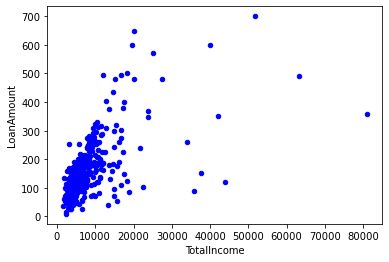

In [17]:
sns.reset_orig()
df.plot.scatter(x='TotalIncome', y='LoanAmount', c='Blue')

The correlation table presents its highest correlation between 'LoanAmount' and 'TotalIncome' among all variables. So we decided to do linear regression prediction between both these variables to predict the missing values for 'LoanAmount'. 

In [18]:
from sklearn.linear_model import LinearRegression

# Making X_Train, y_train on rows WIHTOUT NULL value of Loan Amount
X_train = df['TotalIncome'][~df['LoanAmount'].isna()].values.reshape(-1,1)
y_train = df['LoanAmount'][~df['LoanAmount'].isna()].values.reshape(-1,1)

# Making X_pred on rows WITH missing value of Loan Amount
X_pred = df['TotalIncome'][df['LoanAmount'].isna()].values.reshape(-1,1)

# Making Linear Regression model with these two variables
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict the missing value of Loan Amount with Linear regression
y_pred = regressor.predict(X_pred)

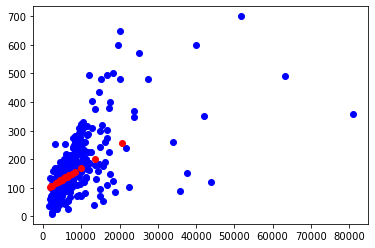

In [19]:
# Plot the train and predict values 
plt.scatter(X_train, y_train,  color='blue')
plt.scatter(X_pred, y_pred,  color='red')
plt.show()

The red color shows the predict of 'LoanAmount' for missing values. It is reasonable as the higher total income the higher loan amount. 

In [20]:
df['LoanAmount'][df['LoanAmount'].isna()] = y_pred.reshape(1,-1)[0]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df.isnull().sum(axis=0).sort_values(ascending = False)

TotalIncome          0
Loan_Status          0
Property_Area        0
Credit_History       0
Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
ApplicantIncome      0
Self_Employed        0
Education            0
Dependents           0
Married              0
Gender               0
Loan_ID              0
dtype: int64

In [22]:
df.drop(columns=['TotalIncome'], inplace=True)

#### 1.5 Univariate Analysis

In [23]:
# Get list of numerical columns
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()
numeric_features = df[num_cols]
num_cols.remove('Credit_History')
num_cols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [24]:
# Get list of categorical columns
cate_cols = df.select_dtypes(include=['object']).columns.tolist()
cate_cols.remove('Loan_ID')
cate_cols.remove('Loan_Status')
cate_cols.append('Credit_History')
cate_features = df[cate_cols]
cate_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Credit_History']

In [25]:
df['Credit_History'] = [int(x) if ~np.isnan(x) else x  for x in df['Credit_History'] ]
df['Credit_History'] = df['Credit_History'].astype(str)

#### Numeric feature

In [26]:
numeric_features.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  146.230157        342.410423   
std        6109.041673        2926.248369   84.276910         64.428629   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  128.000000        360.000000   
75%        5795.000000        2297.250000  165.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.855049  
std          0.352339  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

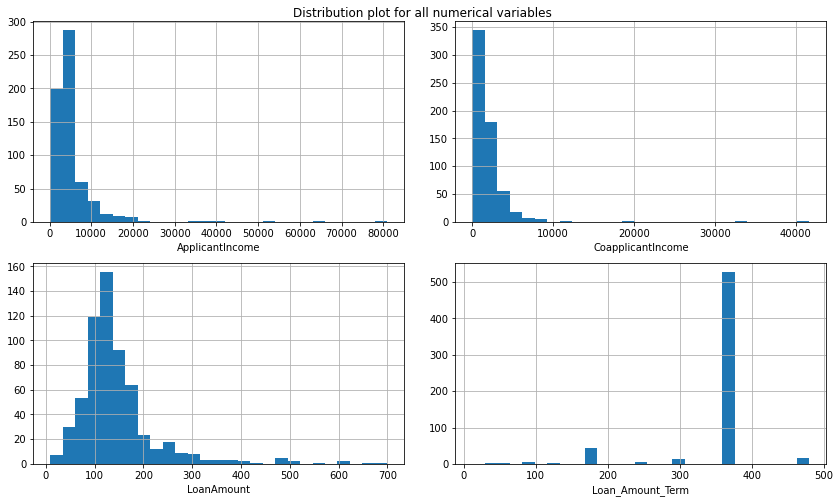

In [27]:
sns.reset_orig()

# Find rows and columns for plot display
rows = len(num_cols)//2 + 1 if len(num_cols)%2 else len(num_cols)//2
cols = 2

# Create figure
plt.rcParams['figure.figsize'] = [12, 7]
fig, axs = plt.subplots(rows, cols)
fig.suptitle('Distribution plot for all numerical variables')
fig.tight_layout(pad=2.0)

# Defaults bins 
bins = np.int(1 + 3.322*np.log(df.shape[0])) + 5

# Display all histogram plots
for i,col in enumerate(num_cols):
    irow, icol = np.int(i/cols), np.mod(i, cols)
    ax = axs[irow, icol]
    df[col].hist(bins=bins, ax=ax)
    ax.set_xlabel(col)

We can see that the high frequency of ApplicantIncome and CoApplicantIncome fall into range of 0 to 10,000. Also, there are few people with very high income from 20,000 to 80,000. Meanwhile, the highest concentration of loan amount is greater than 100 and less than 200 while few loans are higher than 400. The greatest amount of loan term is in range of 300 and 400. 

//anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
//anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
//anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is

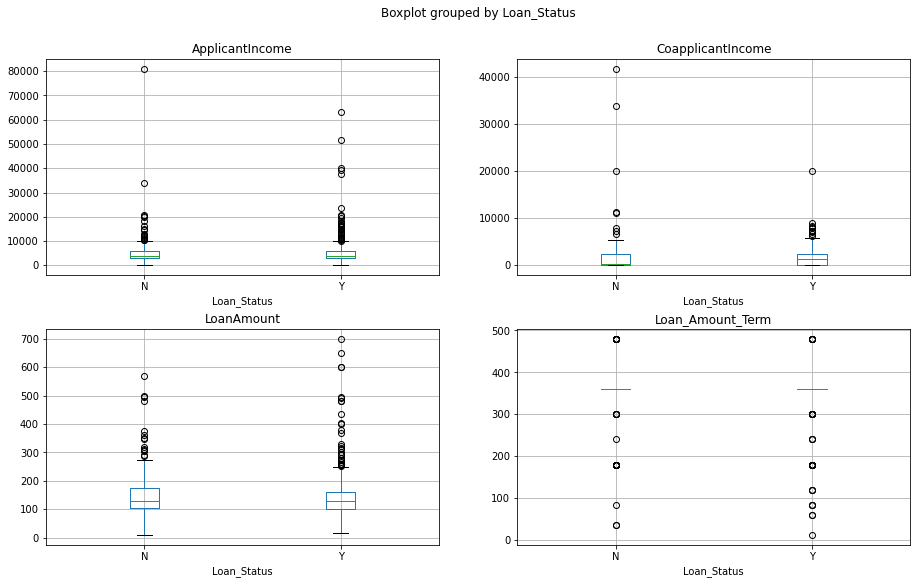

In [28]:
sns.reset_orig()

# Find rows and columns for plot display
rows = len(num_cols)//2 + 1 if len(num_cols)%2 else len(num_cols)//2
cols = 2

# Create figure
plt.rcParams['figure.figsize'] = [15, 9]
fig, axs = plt.subplots(rows, cols)
fig.suptitle('Distribution plot for all numerical variables')
fig.tight_layout(pad=4.0)

# Display all boxplots
for i,col in enumerate(num_cols):
    irow, icol = np.int(i/cols), np.mod(i, cols)
    ax = axs[irow, icol]
    df.boxplot(column=col, by='Loan_Status', ax=ax)
#    ax.set_xlabel(col)

Data distributions of variables as ApplicantIncome, LoanAmount and Loan_Amount_Term are quite similar between the Yes and No class of Loan_Status. Also, we can find outliers on these variables.

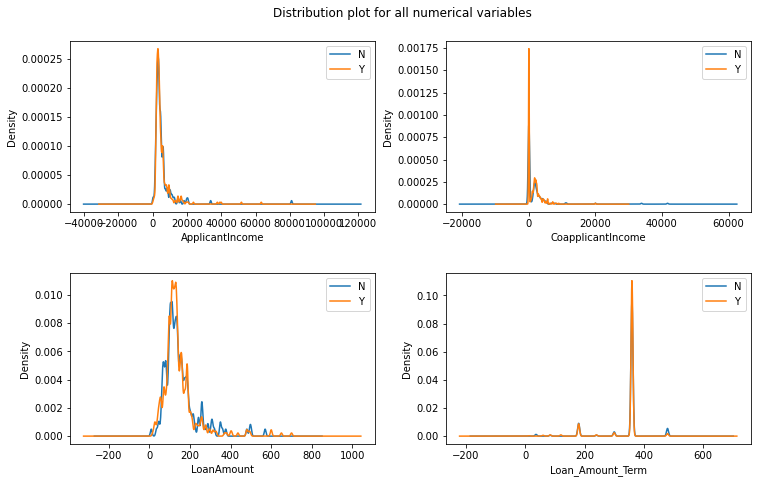

In [29]:
# Find rows and columns for plot display
rows = len(num_cols)//2 + 1 if len(num_cols)%2 else len(num_cols)//2
cols = 2

# Create figure
plt.rcParams['figure.figsize'] = [11, 7]
fig, axs = plt.subplots(rows, cols)
fig.suptitle('Distribution plot for all numerical variables')
fig.tight_layout(pad=4.0)

# Display all boxplots
for i,col in enumerate(num_cols):
    irow, icol = np.int(i/cols), np.mod(i, cols)
    ax = axs[irow, icol]
    df.groupby('Loan_Status')[col].plot(kind='density', bw_method=0.05, legend=True, ax=ax)
    ax.set_xlabel(col)
plt.show()

### Categorical data

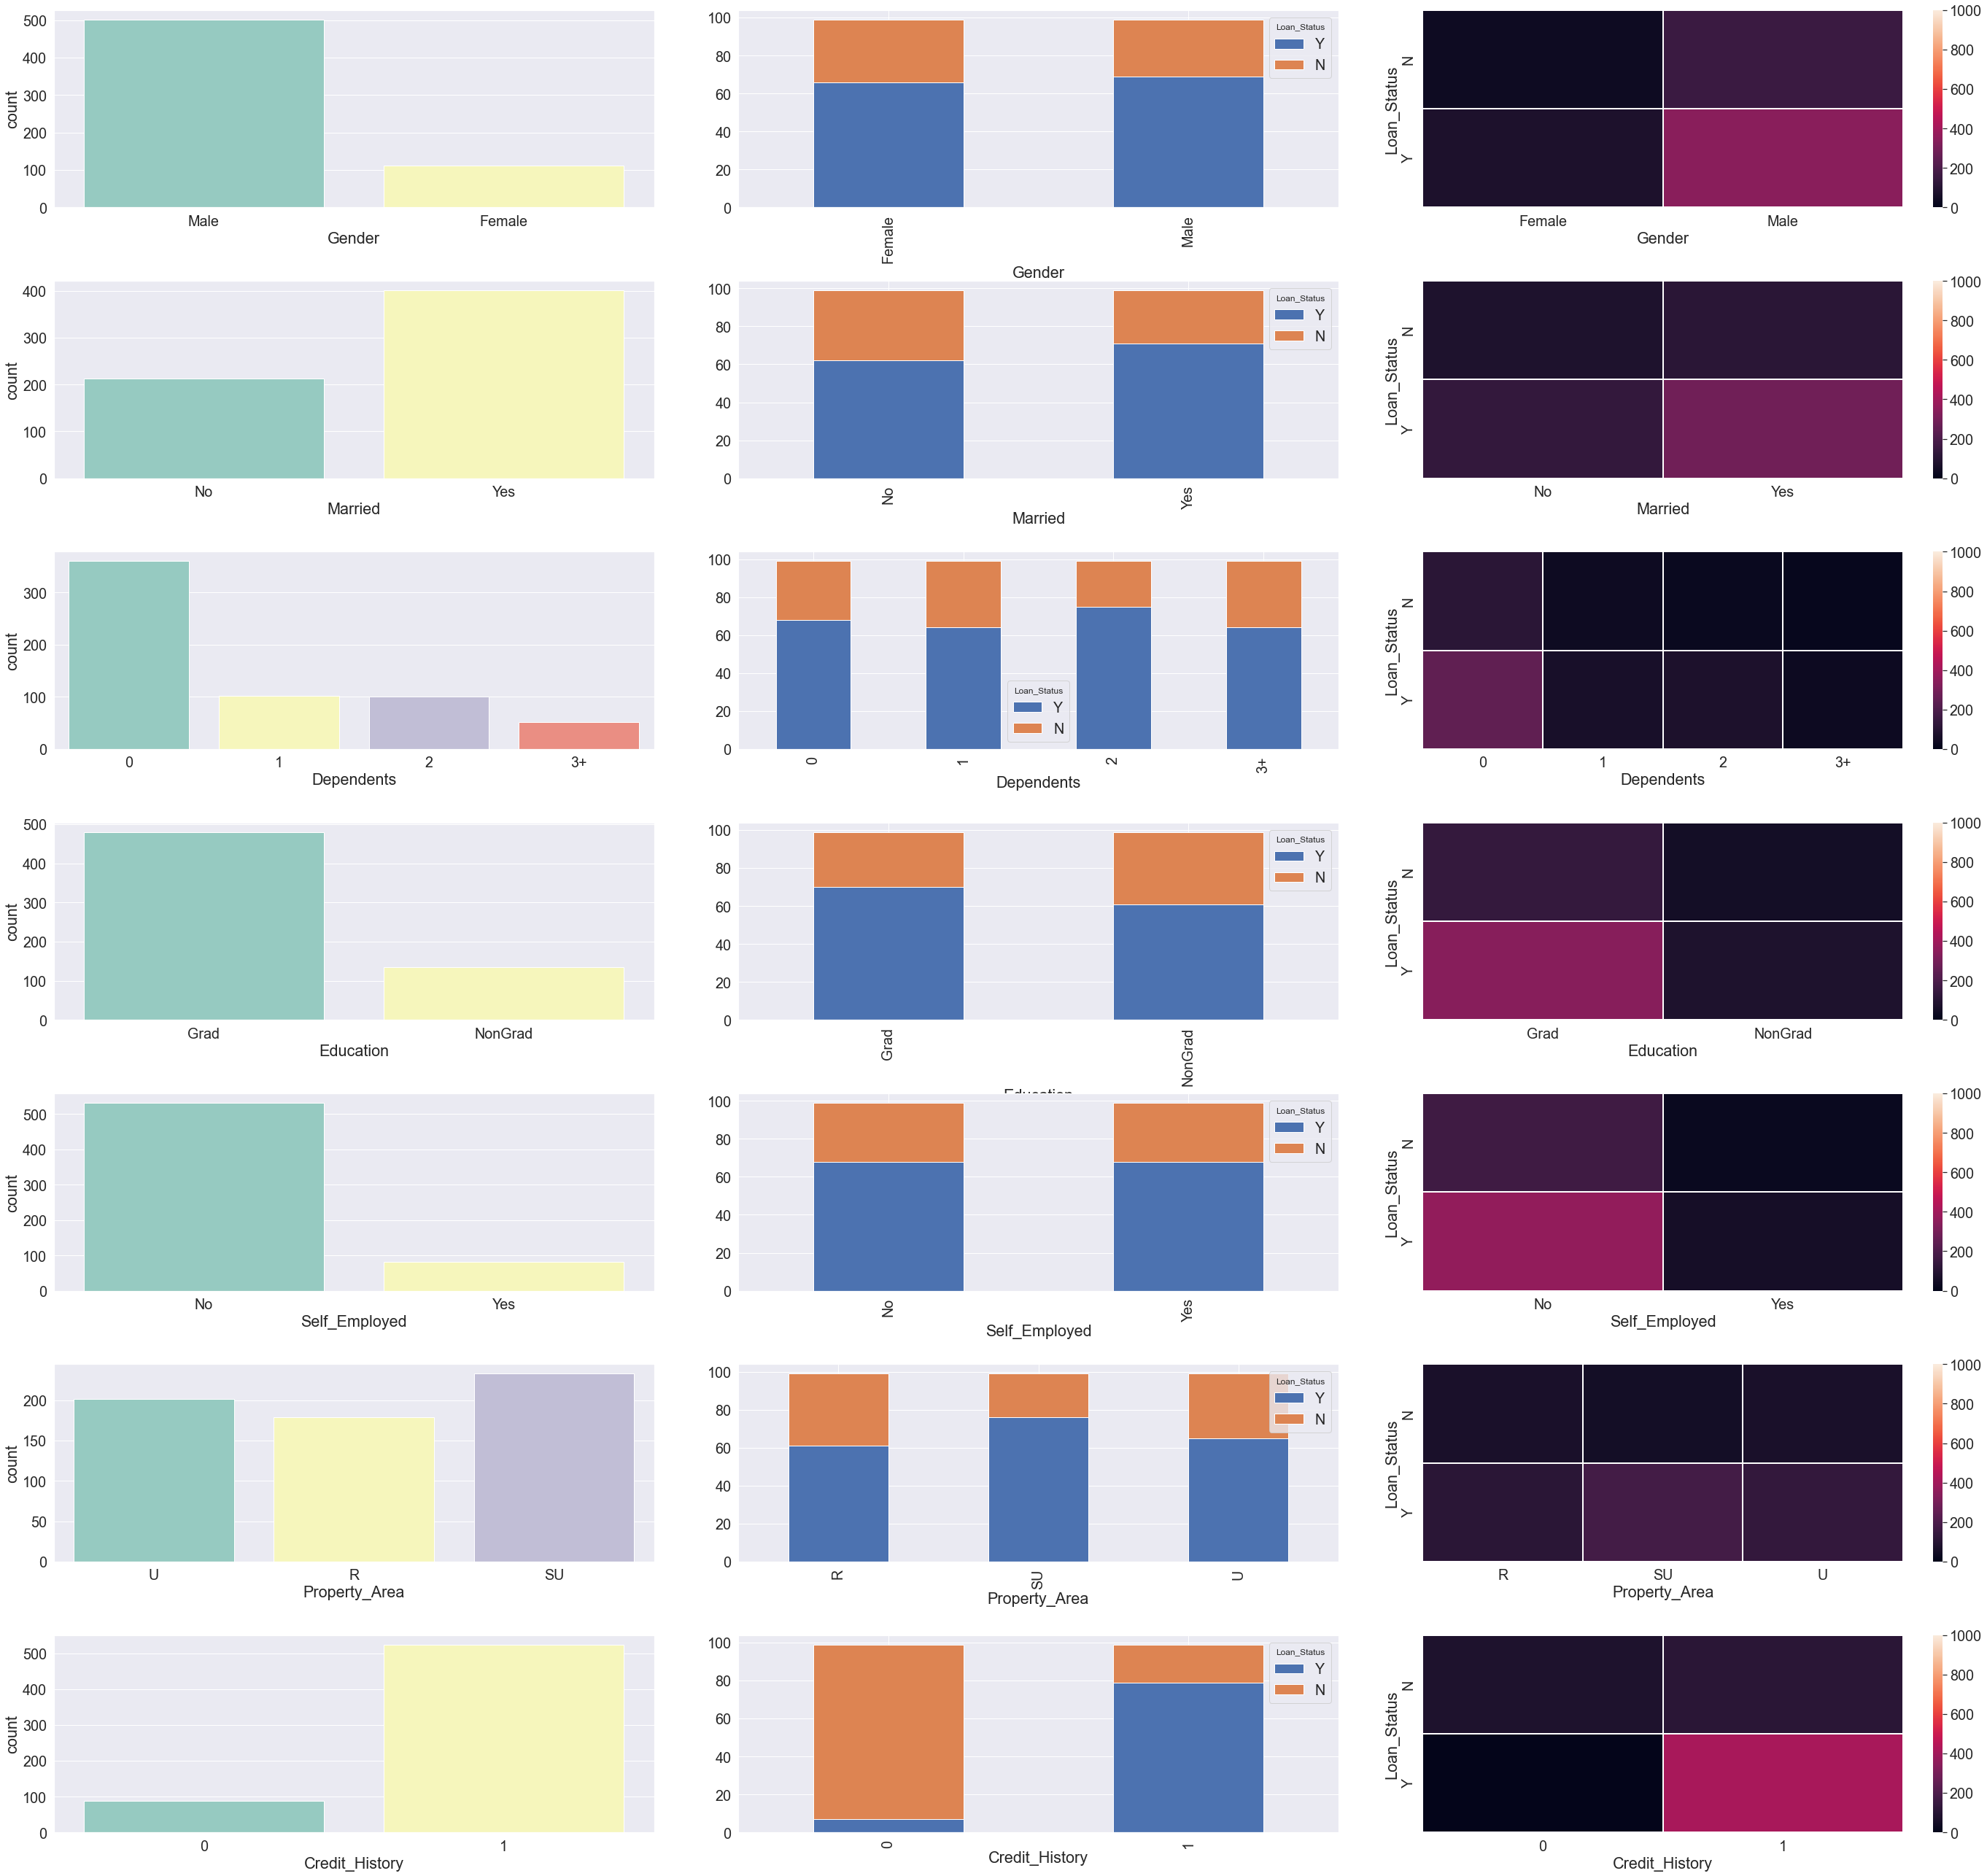

In [30]:
sns.reset_orig()
sns.set(font_scale = 1.8)

# Find rows and columns for plot display
#rows = len(cate_cols)//2 + 1 if len(cate_cols)%2 else len(cate_cols)//2
rows=len(cate_cols)
cols = 3

# Create figure
plt.rcParams['figure.figsize'] = [40, 37]
fig, axs = plt.subplots(rows, cols)
fig.tight_layout(pad=3)

# Display all boxplots
for i,col in enumerate(cate_cols):
    irow, icol = i, 0
    ax1 = axs[irow, icol]
    ax2 = axs[irow, icol+1]
    ax3 = axs[irow, icol+2]
    
    # Bar plot
    # pd.crosstab(index=df[col], columns=df["Loan_Status"]).reindex(columns=['Y', 'N']).plot(kind="bar", stacked=True, ax=ax1)
    sns.countplot(x=col, data=df, palette="Set3", ax=ax1)
    
    
    # Bar plot
    dft = pd.crosstab(index=df[col], columns=df["Loan_Status"]).reindex(columns=['Y', 'N'])
    dft1 = dft.apply(lambda x: [int(x[0] / (x[0]+x[1]) * 100), int(x[1] / (x[0]+x[1]) * 100)], axis=1)
    dft2 = pd.DataFrame(dft1.values.tolist(), index=dft1.index)
    dft2.columns = dft.columns
    dft2.plot(kind="bar", stacked=True, ax=ax2)
    
    # Heamap plot
    dft = pd.pivot_table(df, values=['Loan_ID'], index=['Loan_Status'], columns=[col], aggfunc='count')
    sns.heatmap(dft, vmin=0, vmax=1000, ax=ax3, linewidths=1)  
    ax3.set_xticklabels([x.get_text().replace('Loan_ID-', '') for x in ax3.get_xticklabels()])
    ax3.set_xlabel(ax3.get_xlabel().replace('None-', '')) 
    
plt.show()

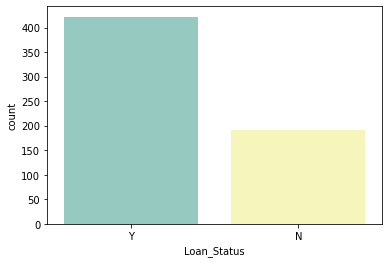

In [31]:
sns.reset_orig()

sns.countplot(x='Loan_Status', data=df, palette="Set3")

On the left side, we can see the high imbalance in number of observations between classes for each categorical variable. For example, number of male observations is greater than female observations, Married - Yes over Married - No, Graduate over Not-Graduate, Self-Employed - No over Self-Employed - Yes, Credit History - Yes over Credit History - No and people with no dependents over dependents 1, 2 or 3+. 

Although they present high imbalance, on the middle column, we can see the percentage to get loan approval between classes does not give much difference as in Gender, Married, Dependents, Education, Self Employed. 

On the right side, heatmap plot shows that Loan getting approval dominates all the observations. 

### Bivariate Analysis

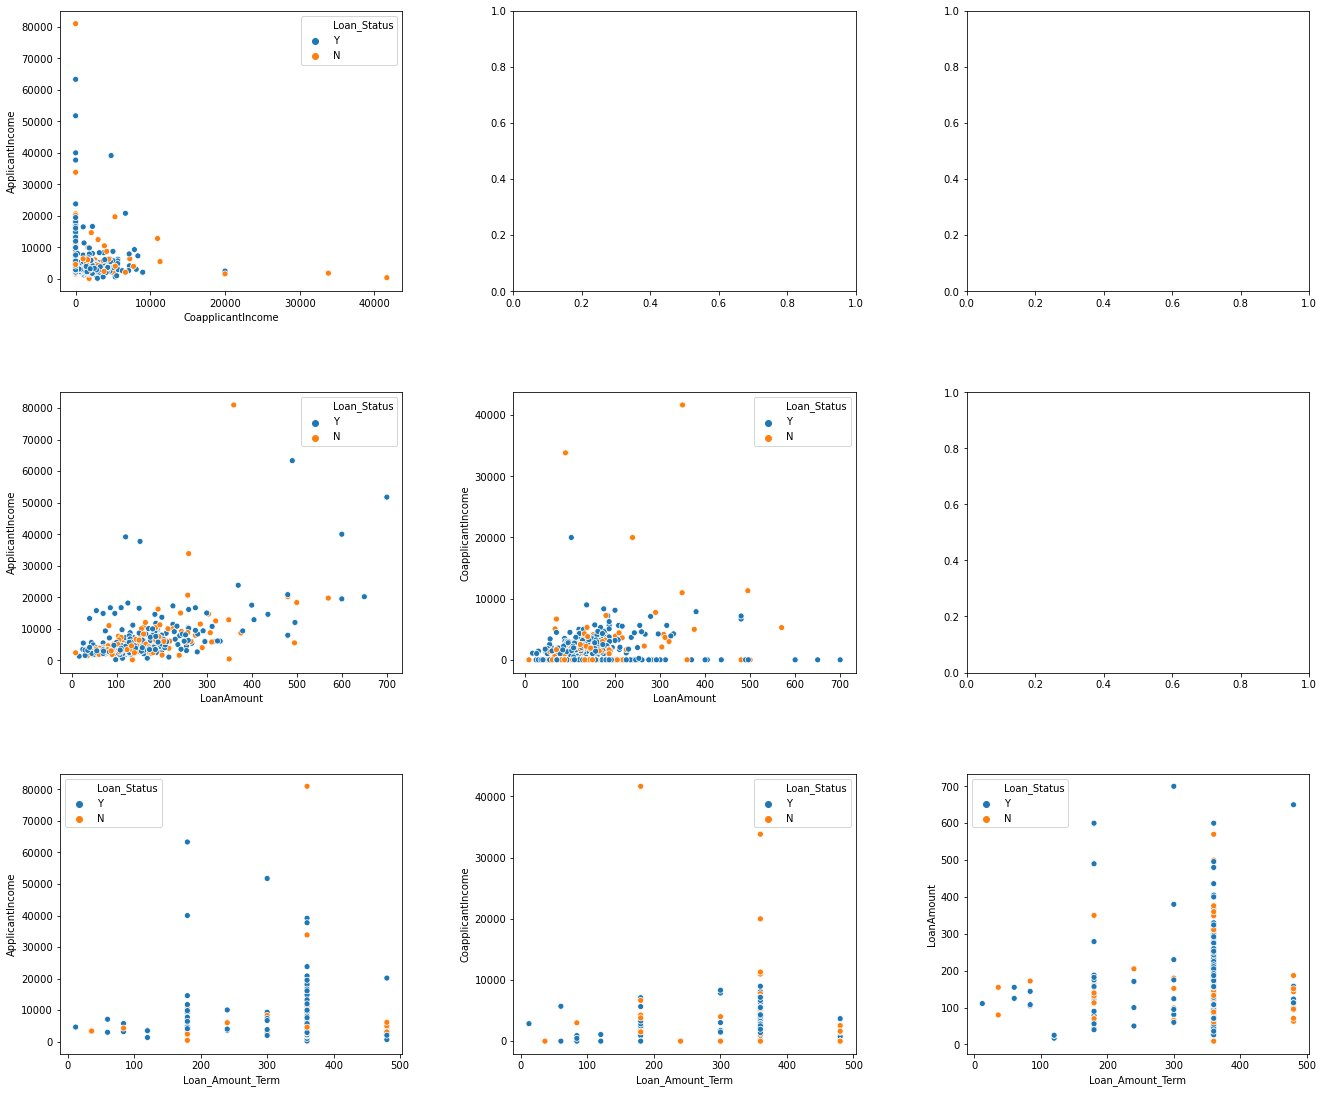

In [32]:
sns.reset_orig()
# Find rows and columns for plot display
rows = len(num_cols) - 1
cols = len(num_cols) - 1

# Create figure
plt.rcParams['figure.figsize'] = [20, 17]
fig, axs = plt.subplots(rows, cols)
fig.tight_layout(pad=8)

for i, col1 in enumerate(num_cols):
    for j in range(0, i):
        col2 = num_cols[j]
        ax = axs[i - 1, j]
        if i>=j:
            sns.scatterplot(x=col1, y=col2, hue='Loan_Status', data=df, ax=ax)
#             sns.lmplot(x=col1, y=col2, hue="Loan_Status", data=df, ax=ax)            

The applicants with high income and zero support from coapplicant seem to get loan approval while it is rare chance for applicant with zero income and high income from coapplicant. 

On the plot, we can see that the higher loan amount the more likely to receive loan approval. And we figure out that 11/15 of 'LoanAmount' greater than 400 received the loan approval.

In [33]:
print(df[(df['LoanAmount'] >= 400) & (df['Loan_Status'] == 'Y')].shape[0], 
      df[(df['LoanAmount'] >= 400)].shape[0])

11 15


In [34]:
dft = pd.DataFrame(columns= ['item', 'count', 'percent'])
for item in df['Loan_Amount_Term'].unique():
    dft = dft.append({'item': item, 
                    'count': df[df['Loan_Amount_Term'] == item].shape[0],
                    'percent': df[df['Loan_Amount_Term'] == item].shape[0] / df.shape[0],
                    'percent-Y': df[(df['Loan_Amount_Term'] == item) & (df['Loan_Status'] == 'Y')].shape[0] / 
                                      df[df['Loan_Amount_Term'] == item].shape[0]}, 
                    ignore_index=True)

dft

item  count   percent  percent-Y
0  360.0  526.0  0.856678   0.697719
1  120.0    3.0  0.004886   1.000000
2  240.0    4.0  0.006515   0.750000
3  180.0   44.0  0.071661   0.659091
4   60.0    2.0  0.003257   1.000000
5  300.0   13.0  0.021173   0.615385
6  480.0   15.0  0.024430   0.400000
7   36.0    2.0  0.003257   0.000000
8   84.0    4.0  0.006515   0.750000
9   12.0    1.0  0.001629   1.000000

Loan_Amount_Term 360 accounts for 85% of total transactions and nearly 70% of them receive loan approval. 

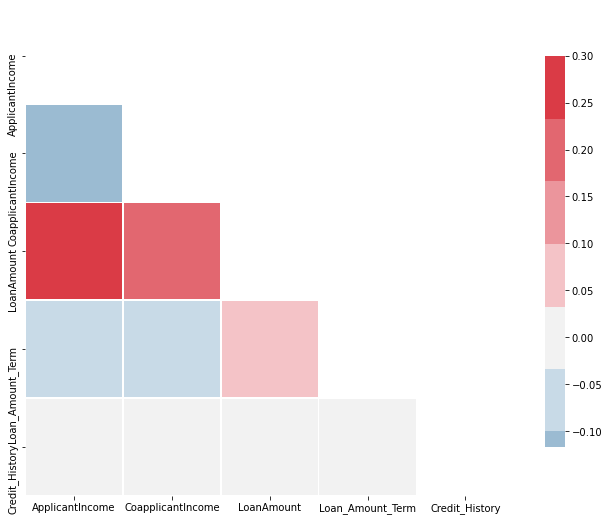

In [35]:
sns.reset_orig()
corr =  numeric_features.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, n=9)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.show()

In [36]:
numeric_features.corr()

ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.573696   
CoapplicantIncome        -0.116605           1.000000    0.187042   
LoanAmount                0.573696           0.187042    1.000000   
Loan_Amount_Term         -0.046531          -0.059383    0.036623   
Credit_History           -0.018615           0.011134    0.001567   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.046531       -0.018615  
CoapplicantIncome         -0.059383        0.011134  
LoanAmount                 0.036623        0.001567  
Loan_Amount_Term           1.000000       -0.004705  
Credit_History            -0.004705        1.000000

LoanAmount & ApplicantIncome presents highest correlation as 0.57 while other correlation are quite low.

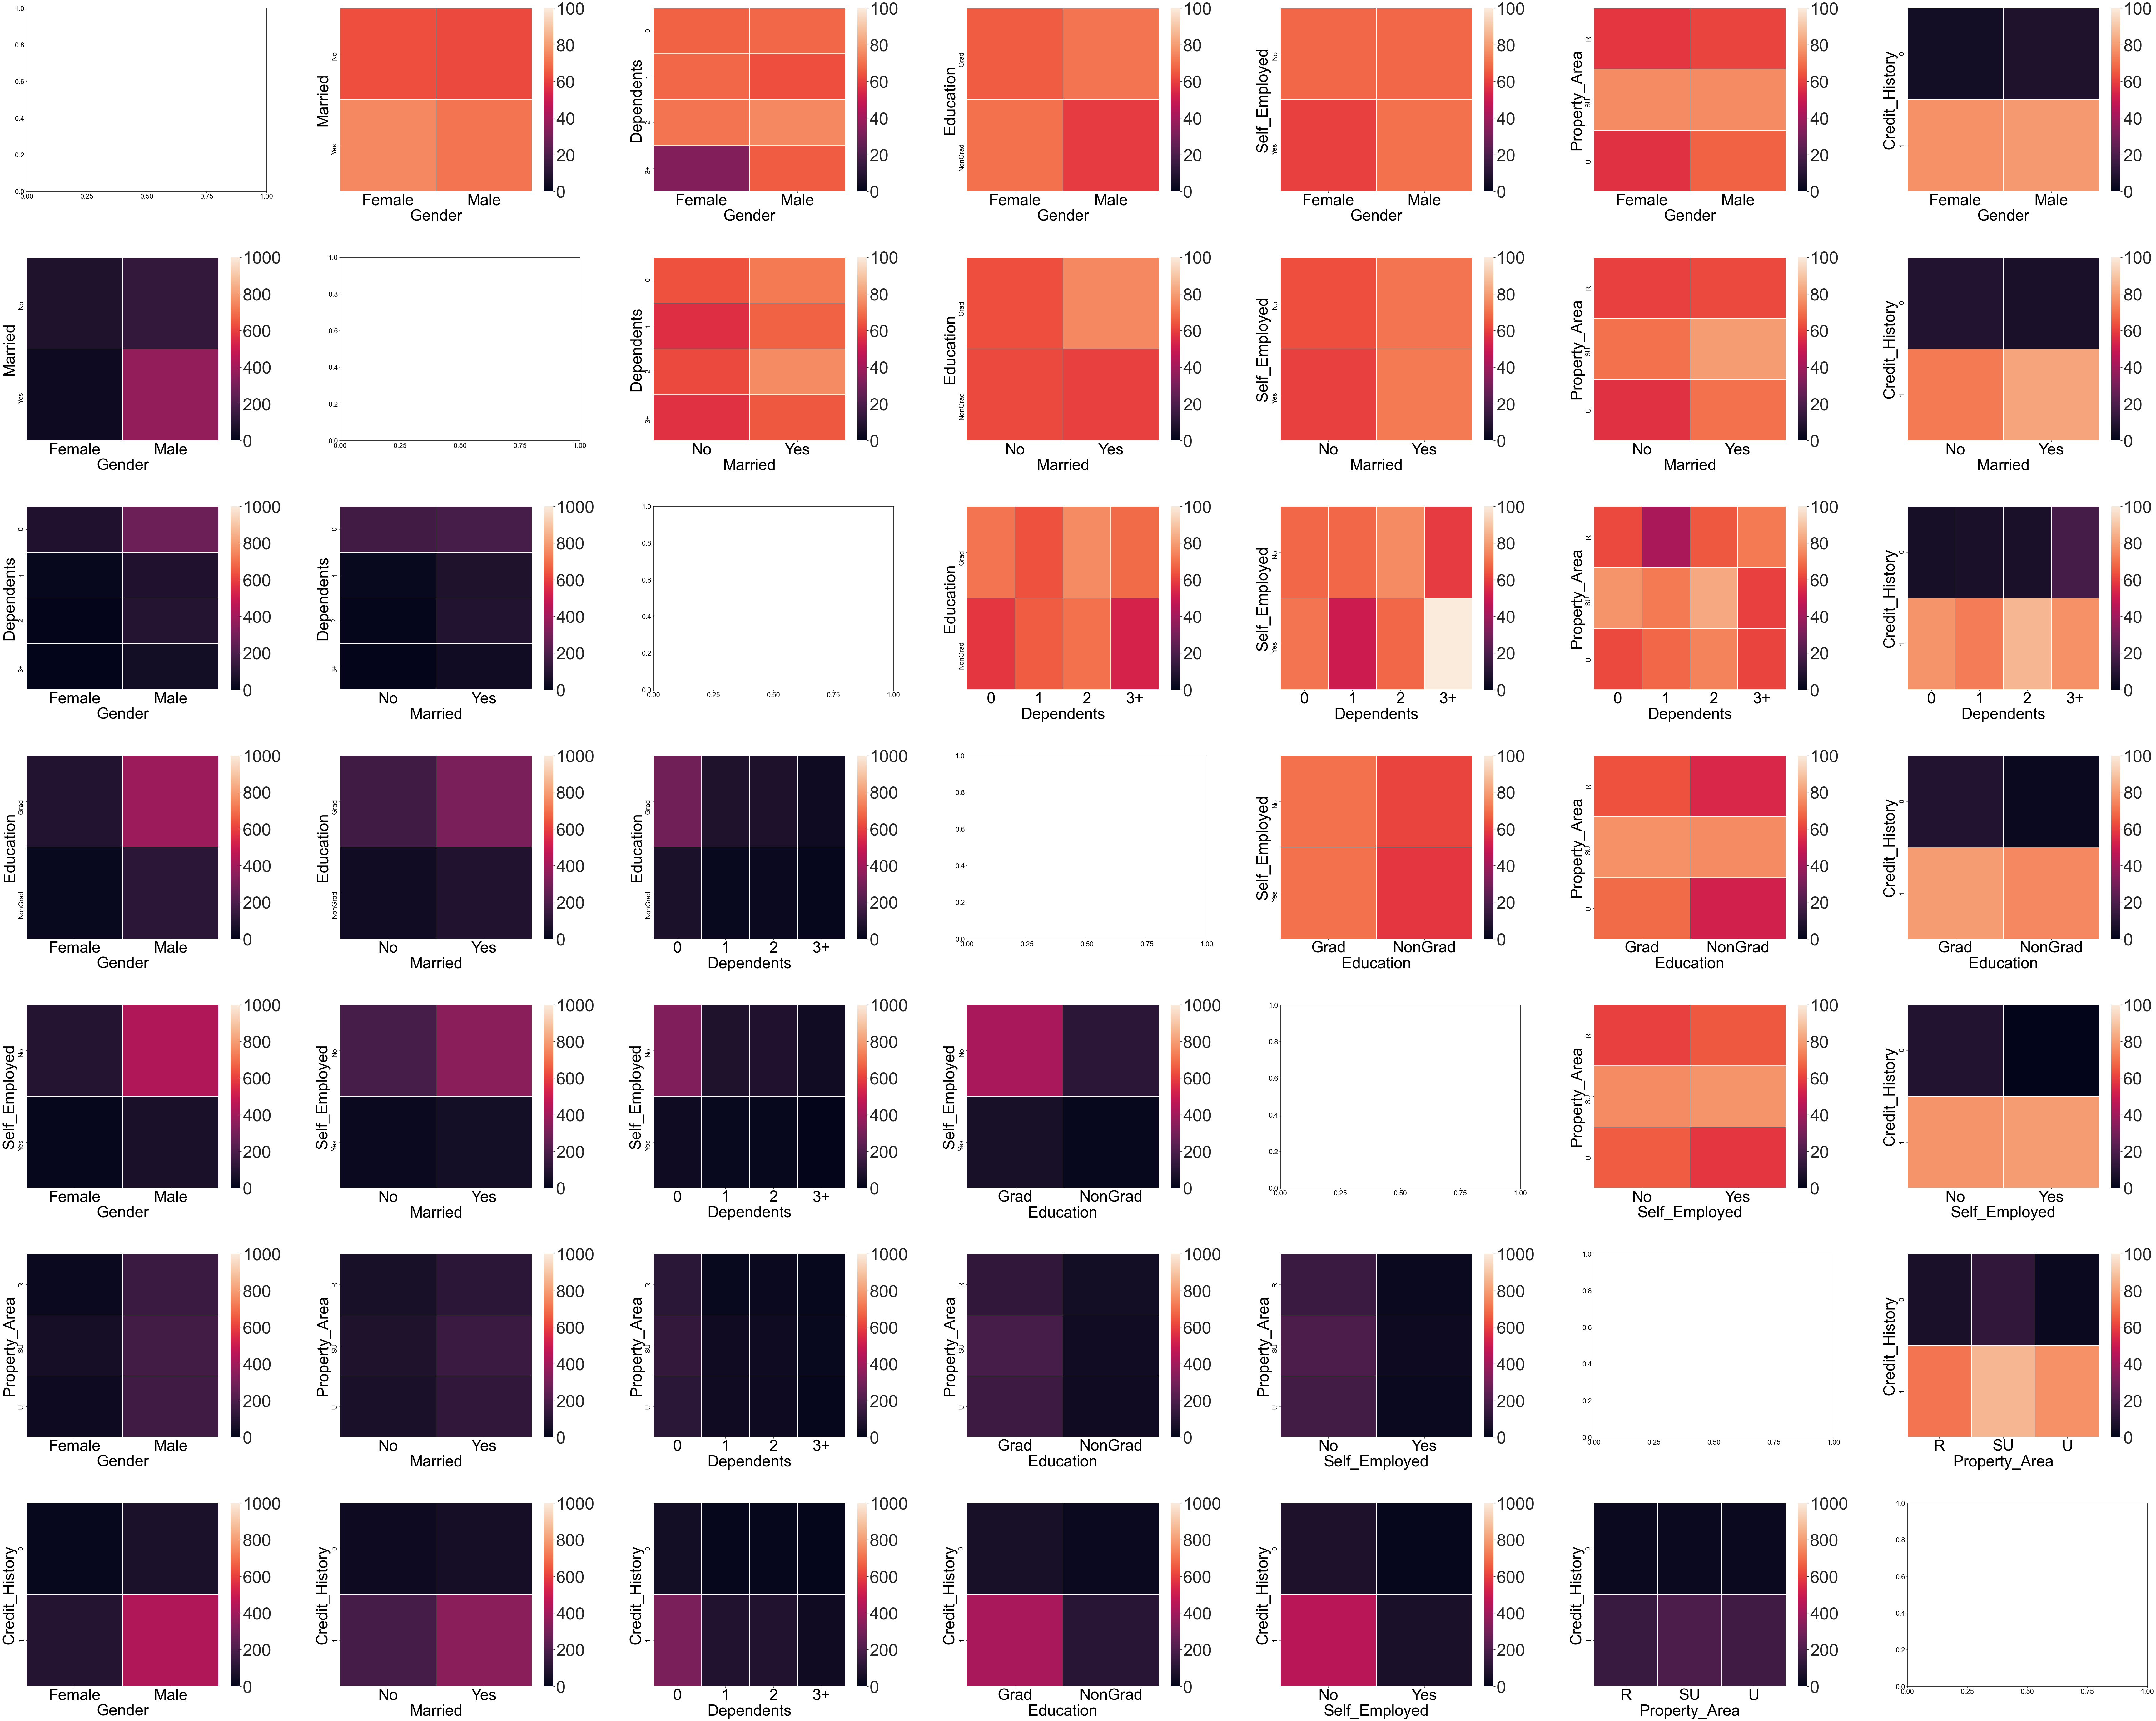

In [37]:

# Find rows and columns for plot display
rows = len(cate_cols)
cols = len(cate_cols)

# Create figure
plt.rcParams['figure.figsize'] = [100, 80]
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(rows, cols)
fig.tight_layout(pad=8)
sns.set(font_scale=5)
        
for i, col1 in enumerate(cate_cols):
    for j in range(0, i):
        col2 = cate_cols[j]
        ax = axs[i, j]
        dft = pd.pivot_table(df, values=['Loan_Status'], index=[col1],columns=[col2], aggfunc='count')
        sns.heatmap(dft, vmin=0, vmax=1000, ax=ax, linewidths=1)  
        ax.set_xticklabels([x.get_text().replace('Loan_Status-', '') for x in ax.get_xticklabels()], 
                                size=50)
        ax.set_xlabel(ax.get_xlabel().replace('None-', ''), size=50)
        ax.set_ylabel(ax.get_ylabel(), size=50)
        #ax.set_yticklabel(ax.set_yticklabel(), size=50)
        
for i, col1 in enumerate(cate_cols):
    for j in range(0, i):
        col2 = cate_cols[j]
        ax = axs[j, i]
        dft = pd.pivot_table(df, values=['Loan_Status'], index=[col1],columns=[col2], 
                             aggfunc=lambda x: int(np.sum(x=='Y') / len(x) * 100))
        sns.heatmap(dft, vmin=0, vmax=100, ax=ax, linewidths=1)  
        ax.set_xticklabels([x.get_text().replace('Loan_Status-', '') for x in ax.get_xticklabels()], 
                                size=50)
        ax.set_xlabel(ax.get_xlabel().replace('None-', ''), size=50) 
        ax.set_ylabel(ax.get_ylabel(), size=50)

On the half lower part, plot shows number of observations per combination of two categorical variables. The bright cell color shows the high density of observations. 
- Self_Employed-No & Gender - Male
- Credit_History-1.0 & Gender - Male
- Credit_History-1.0 & Self Employed - No 

On the upper side, plot shows percentage of loan get approval. Majority of cells are orange color, which shows that high percentage over 60%. There are few black color cells on applicants of no credit history. 

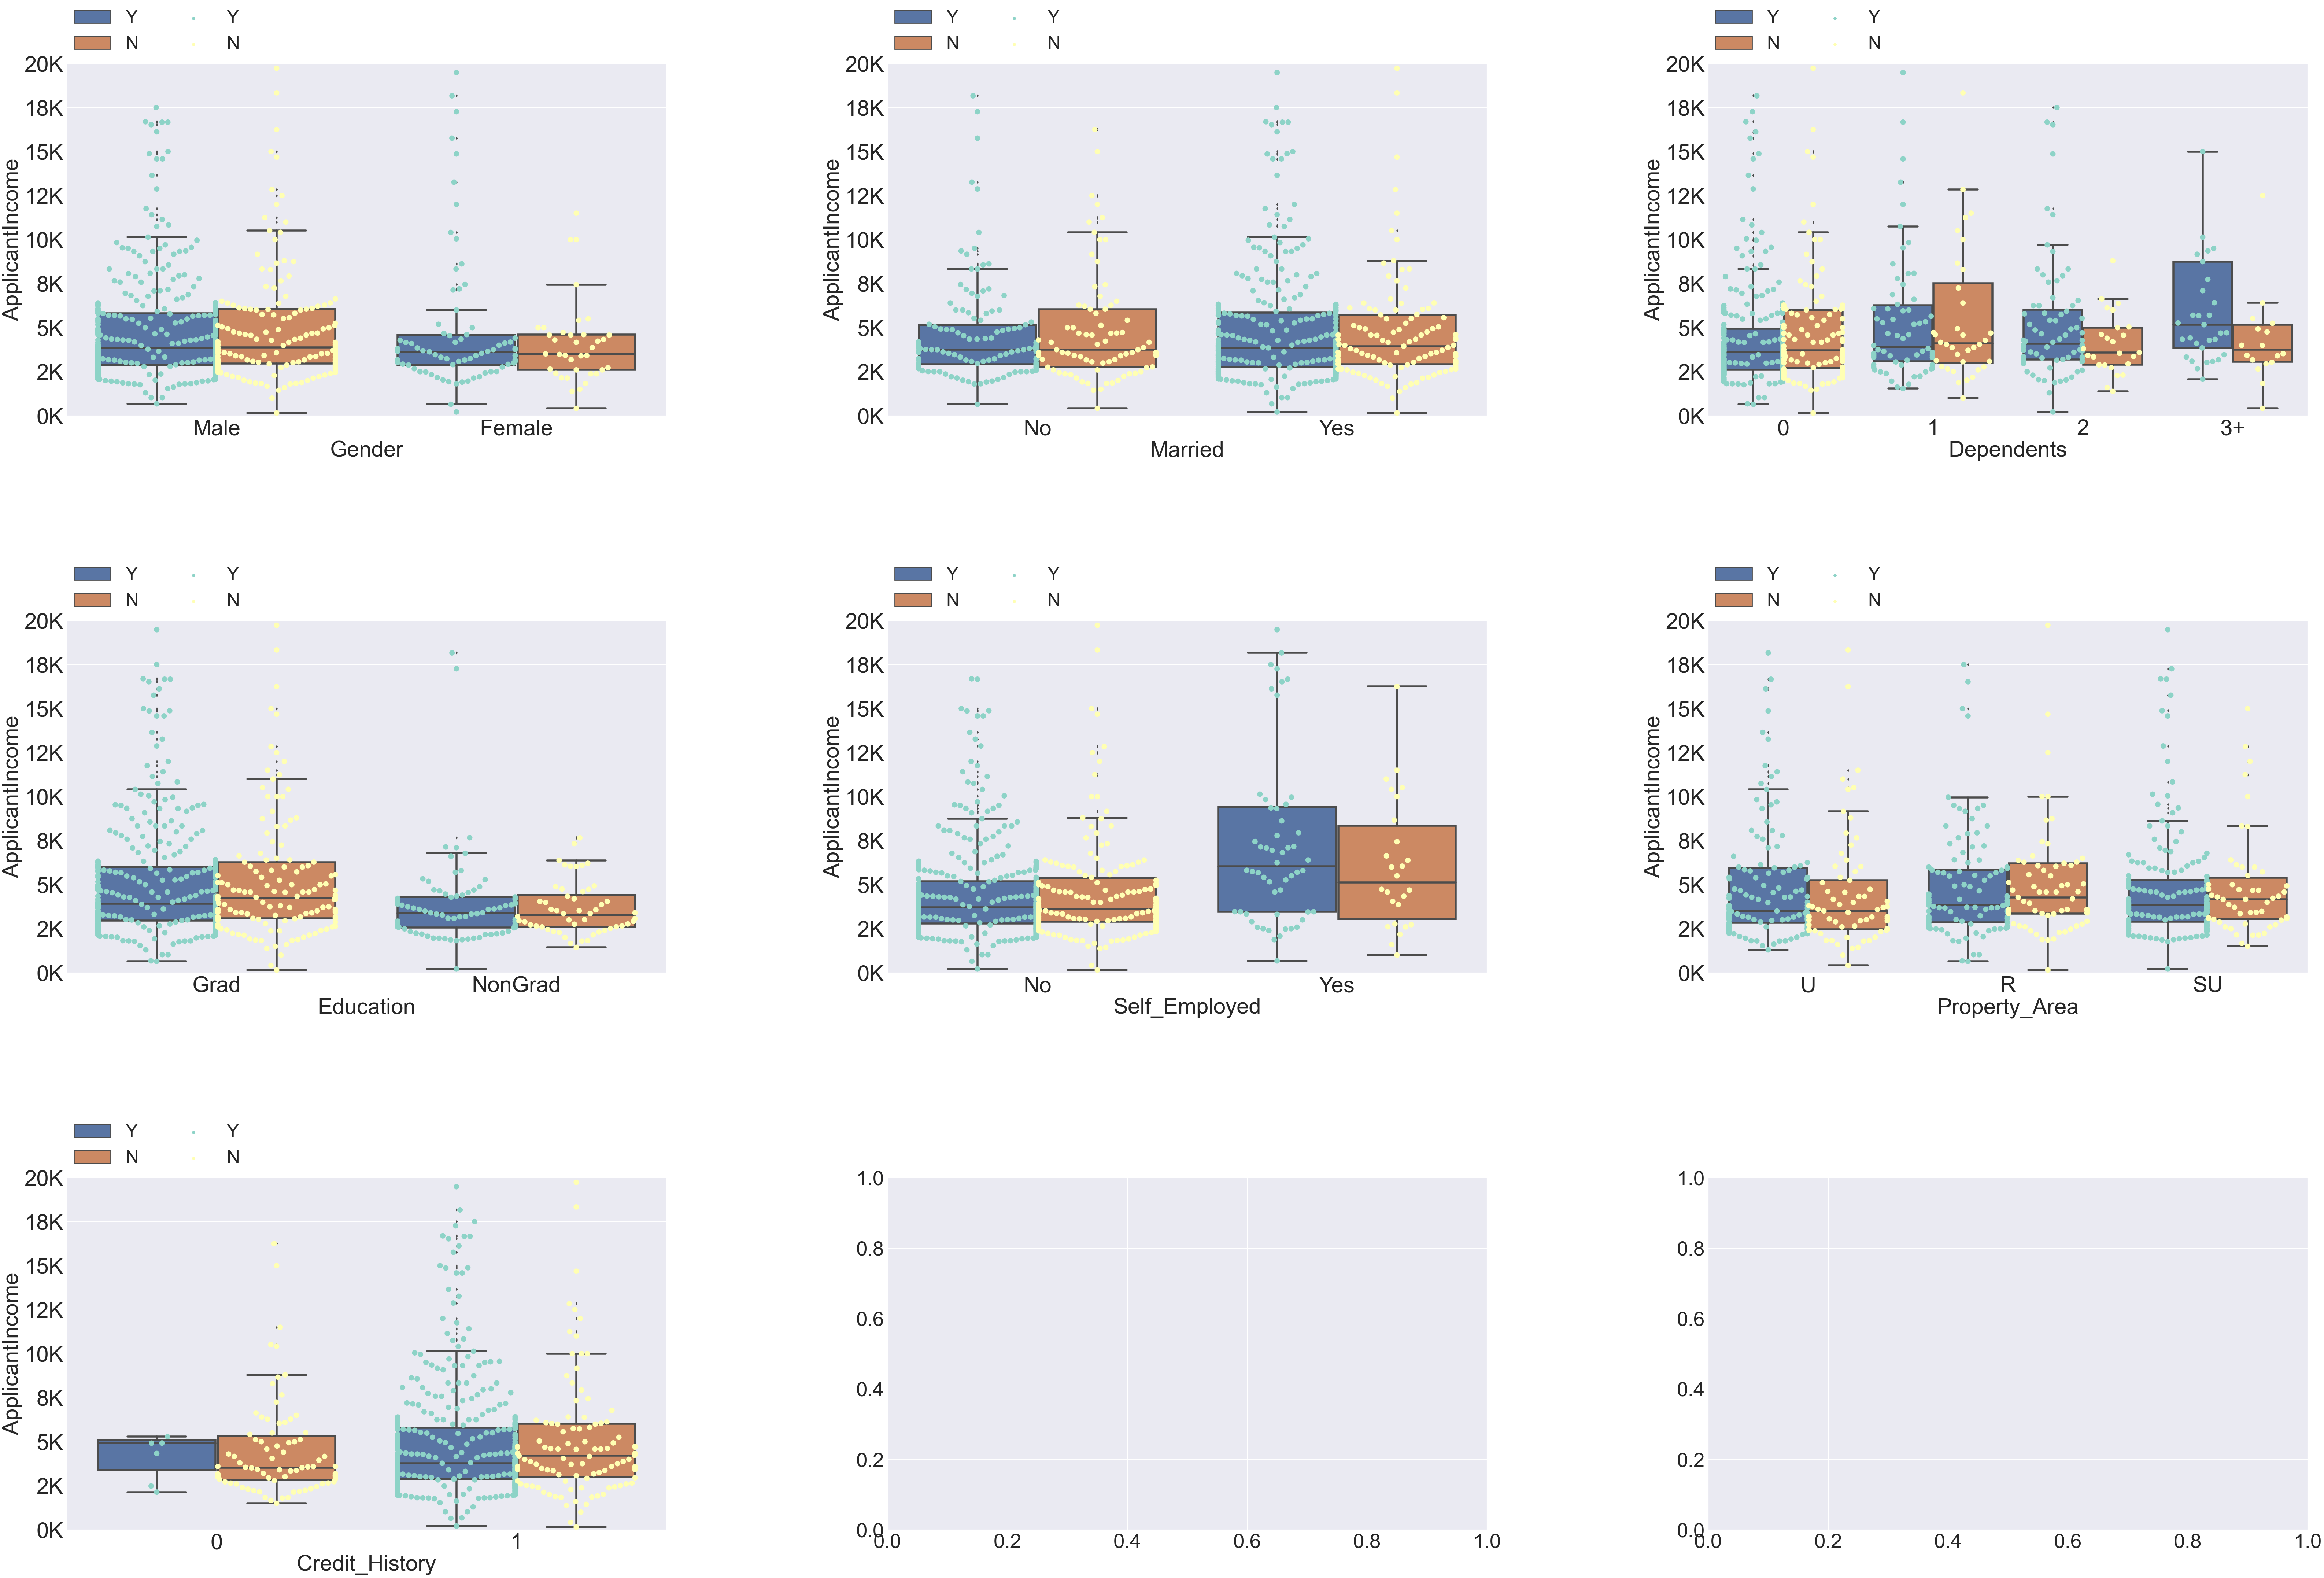

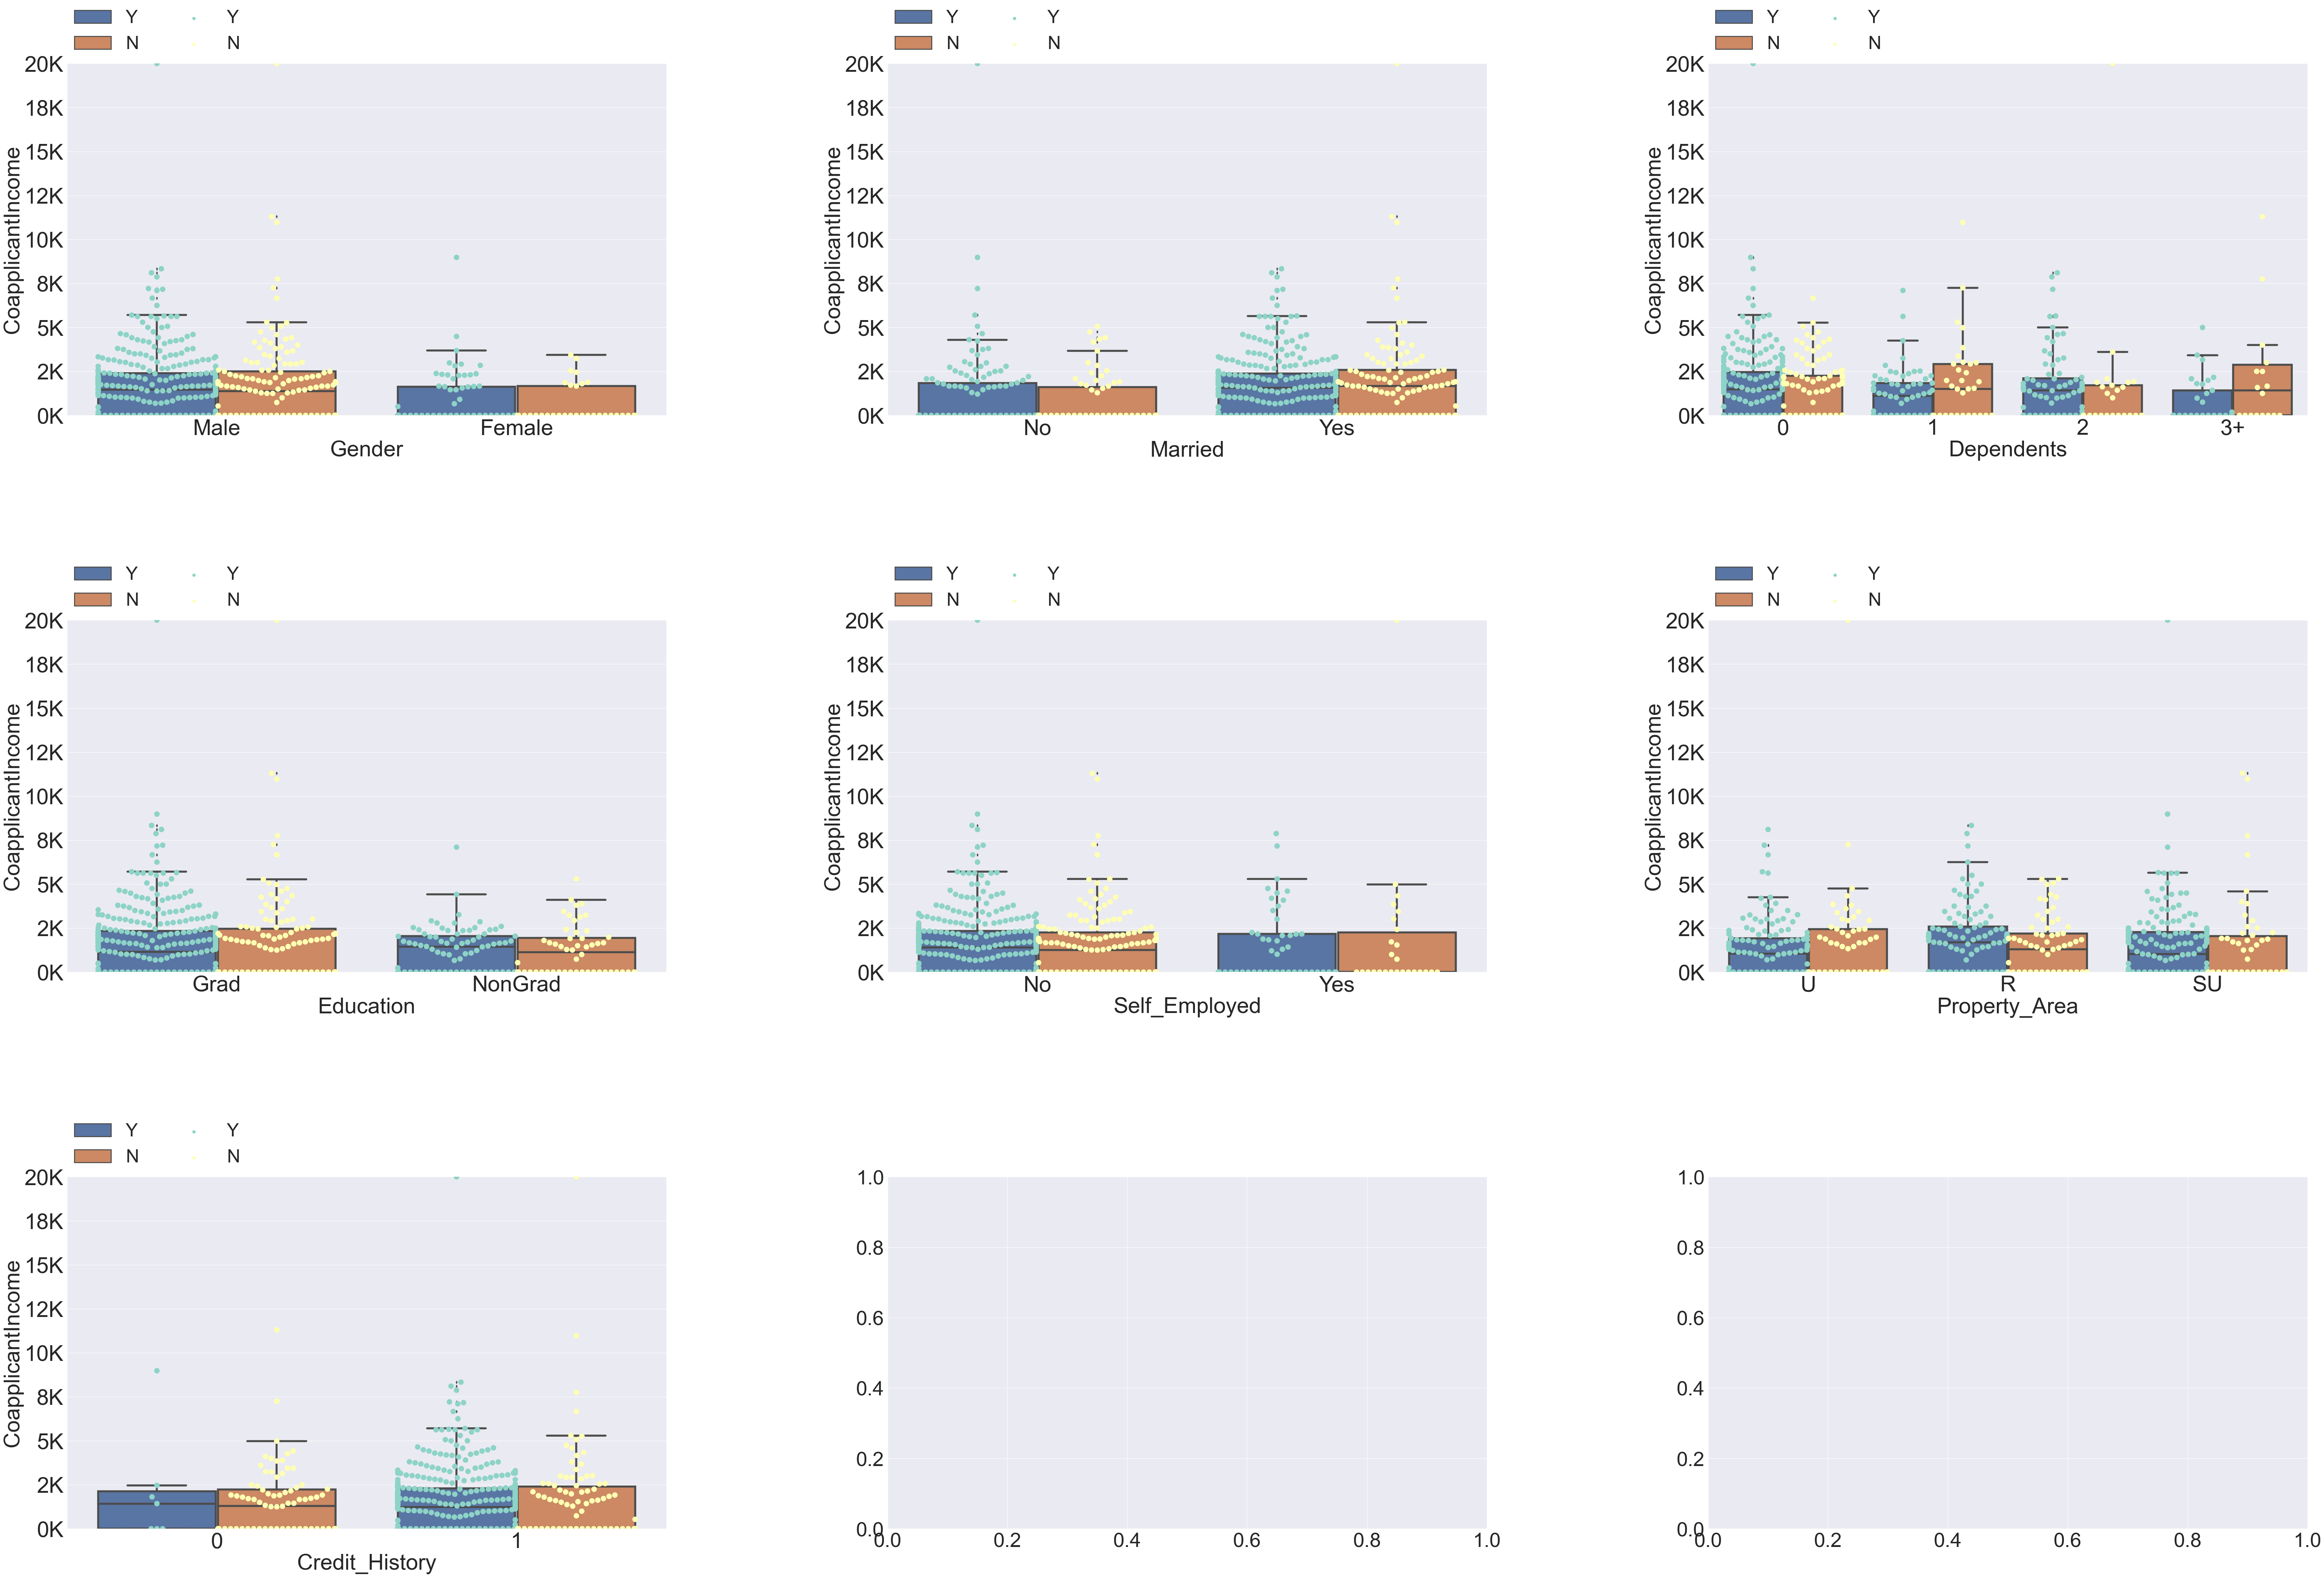

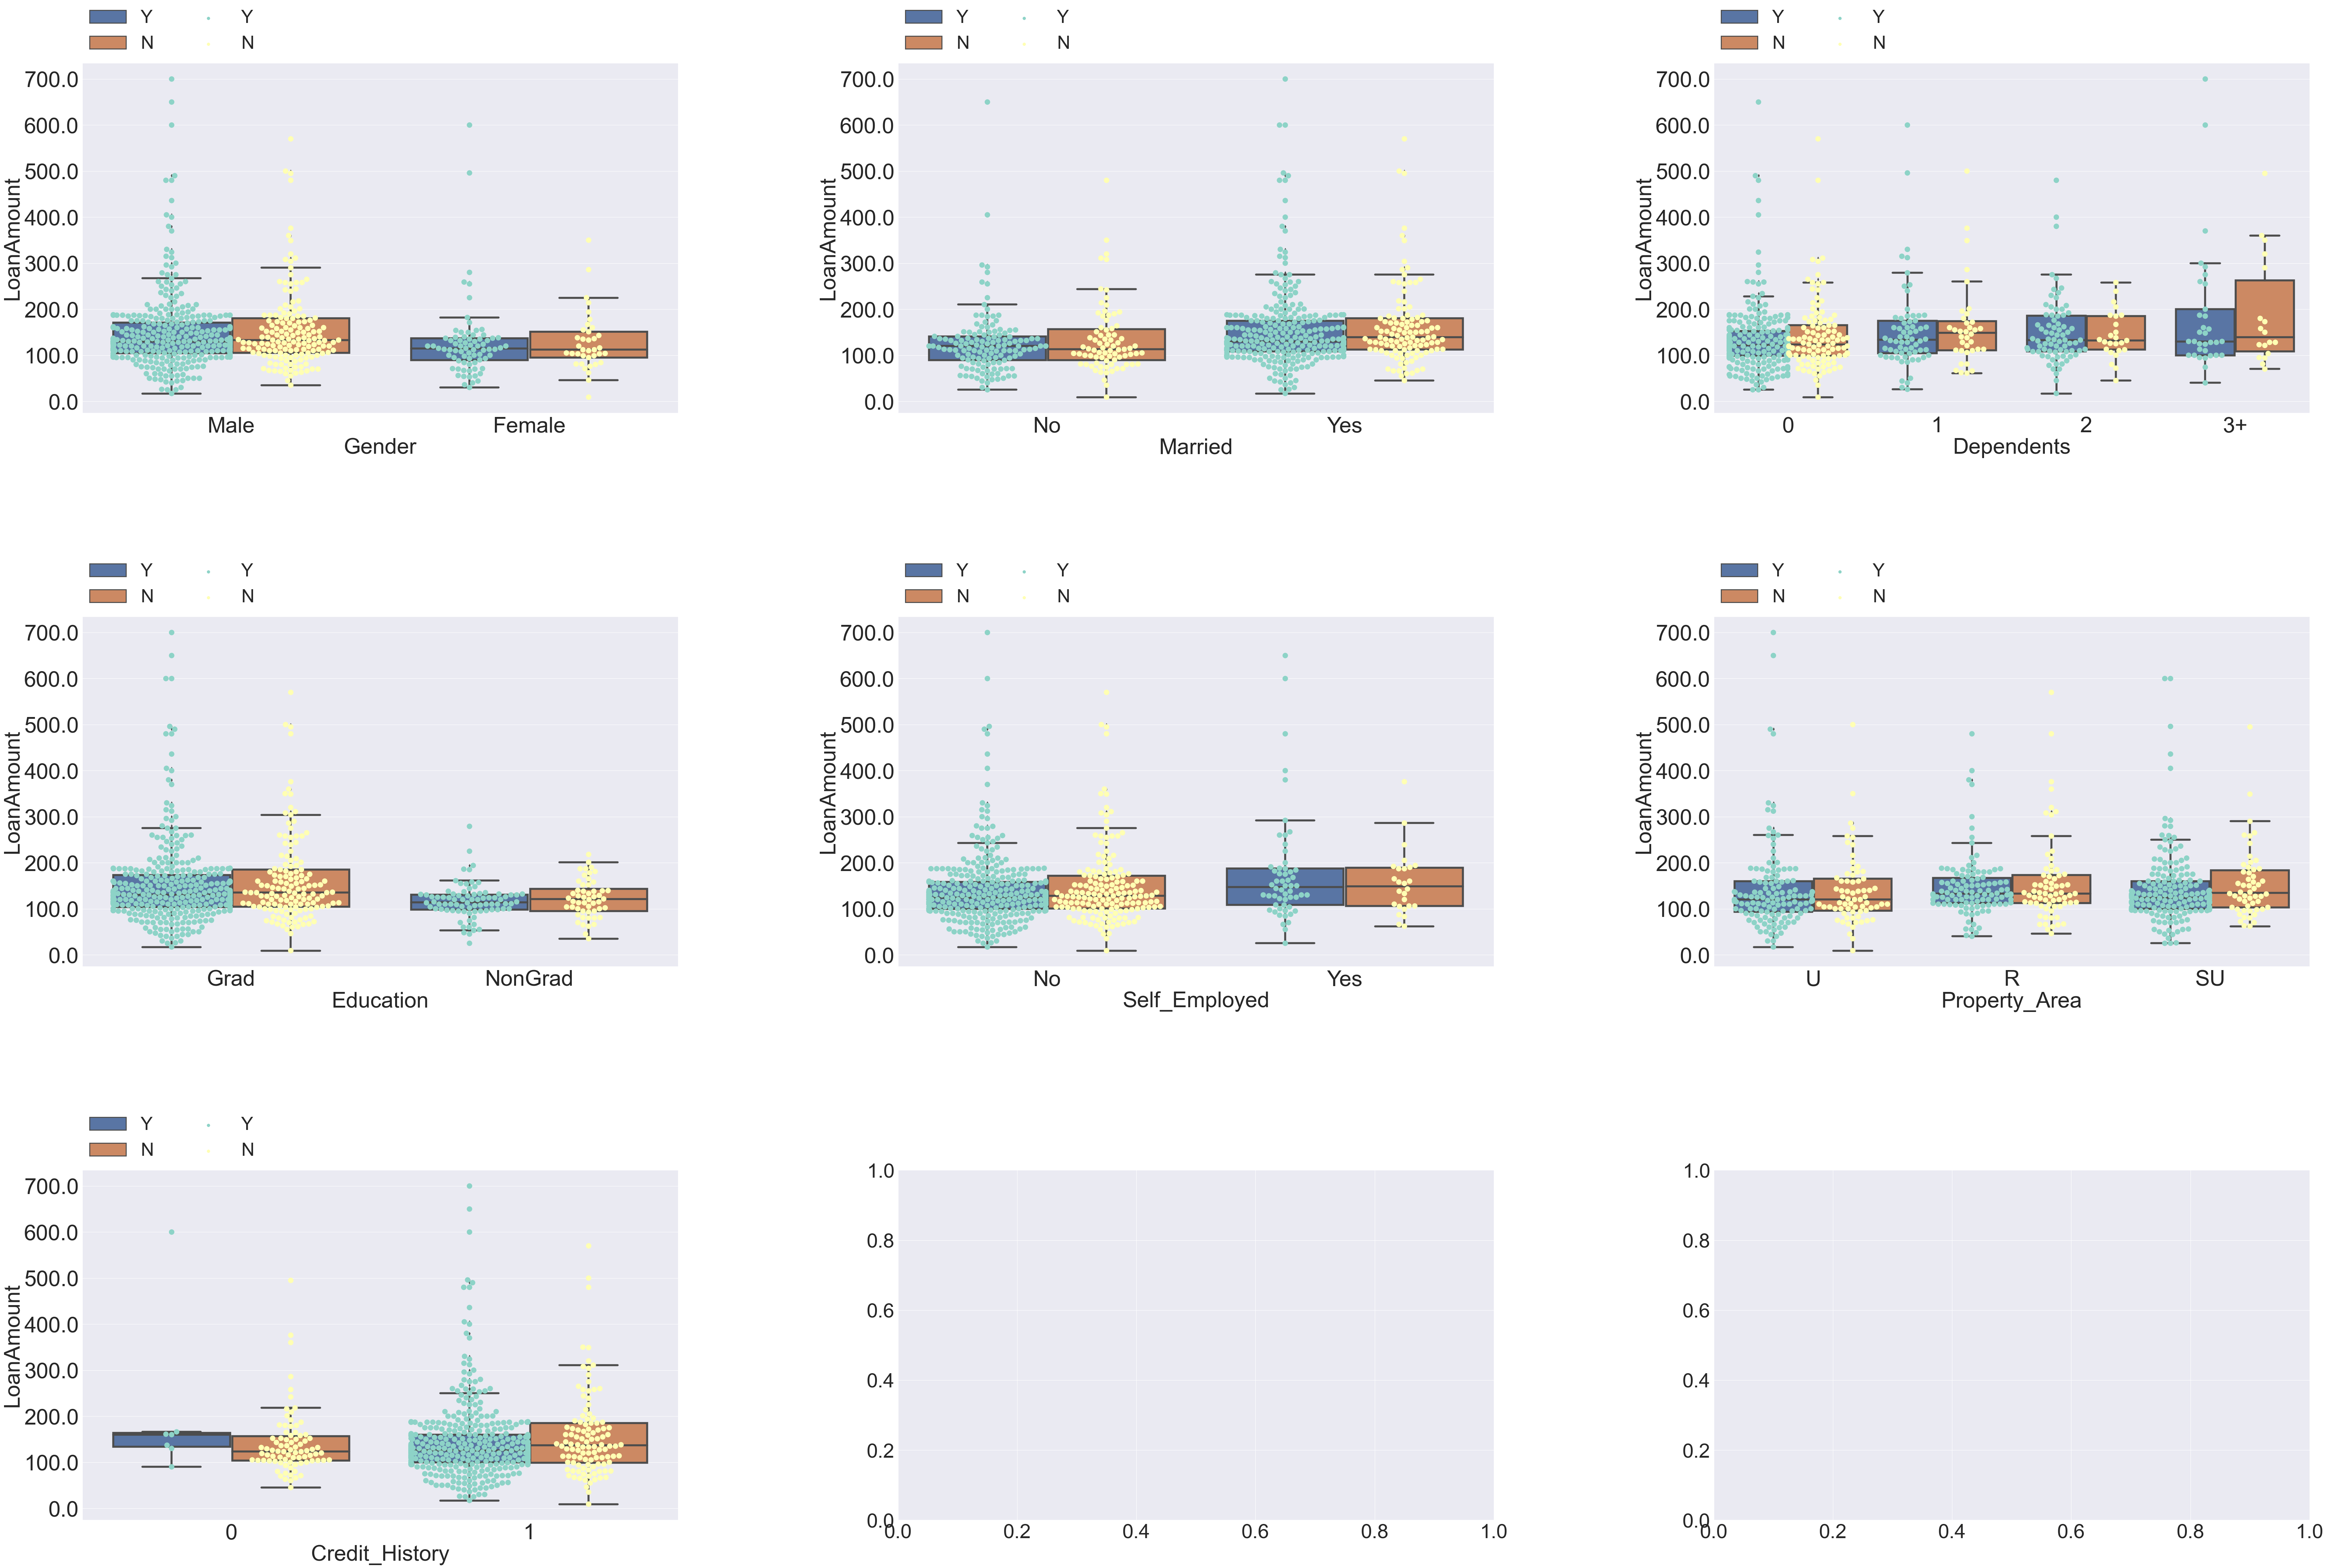

In [38]:
def boxplot_limit(start, end, num_cols, cate_cols, df):
    # Find rows and columns for plot display
    nrow, ncol = len(num_cols), len(cate_cols)
    ncol2, nrow2 = 3, 3
    irow, icol = 0, 0

    # Create figure
    plt.rcParams['figure.figsize'] = [100, 70]
    fig, axs = plt.subplots(nrow2, ncol2)
    fig.tight_layout(pad=8)

    for i, col1 in enumerate(num_cols):
        for j, col2 in enumerate(cate_cols):      

            # Check max item
            nitem = i*ncol+j + 1
            if (nitem >= start and nitem <= end):            

                # Calculate irow, icol
                if (icol >= ncol2 or (icol != 0 and nitem > ncol and (nitem % ncol == 1))):
                    icol, irow = 0, irow + 1

                ax = axs[irow, icol]                  
                sns.boxplot(x=col2, y=col1, hue="Loan_Status", data=df, linewidth = 5.5, ax=ax) 
                custom_palette = sns.color_palette("Set3", 2)
                sns.swarmplot(x=col2, y=col1, hue="Loan_Status", data=df, 
                                       palette=custom_palette, dodge=True, size=15, ax=ax)
                
                # SFormat graph
                ax.set_xlabel(col2,fontsize=60)
                ax.set_ylabel(col1,fontsize=60)
                ax.set_yticklabels(ax.get_yticks(), size=60)
                ax.set_xticklabels(ax.get_xticklabels(), size=60)
                # plt.setp(ax.get_legend().get_texts(), fontsize='50') # for legend text
                # plt.setp(ax.get_legend().get_title(), fontsize='50') # for legend title
                ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,
                        borderaxespad=0, frameon=False, fontsize='50')
                
                if (col1 == 'ApplicantIncome' or col1 == 'CoapplicantIncome'):
                    ax.set_ylim(0, 20000)
                    ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
                    ax.set_yticklabels(ylabels)


                # calculate irow, icol
                icol = icol+1
    

boxplot_limit(1, 7, num_cols, cate_cols, df)
boxplot_limit(8, 14, num_cols, cate_cols, df)
boxplot_limit(15, 21, num_cols, cate_cols, df)
# boxplot_limit(22, 28, num_cols, cate_cols, df)

On the plot, we can compare the mean for among classes of categorical variable and between the Loan approval Yes and No. Few highlights here is: 
- Mean Applicant income of Male little higher than Female, Graduate than Not Graduate, Self Employed - Yes than Self Employed - No, 
- Dependents 3+ is having higher mean of loan approval Yes than loan approval No. It could mean that if applicant have more than 3 defendents, they need to have high income to get loan approval. 
- Similarly, the self-employed applicants should have high income to receive loan approval.

### Multivariate analysis

In [39]:
def checkCorr(df, colarr, colIndex, thres_class, thres_diff, thres_corr):
    
    # Result
    res = []
    
    # Get percent for each class item
    dft = df.groupby(colarr)[colIndex].count().reset_index()
    dft['ClassCombine'] = dft.apply(lambda x: '...'.join([str(x[i]) for i in colarr]), axis=1)    
    dft['Percent'] = dft[colIndex] / df.shape[0]
    
    
    # Iterate through all classes
    for i, idx in enumerate(dft['ClassCombine']):
        
        # If each percent greater than threshold
        if (dft.loc[i, 'Percent'] > thres_class): 
            
            # Retrieve dataframe for that class
            t = df.apply(lambda x: '...'.join([str(x[i]) for i in colarr]), axis=1)
            dft1 = df[t == idx]
        
            # Check correlation is higher than threshold
            t1 = dft1.corr().apply(abs) > thres_corr            

            # Check correlation higher than original correlation
            t2 = (df.corr() - dft1.corr()).apply(abs) > thres_diff

            # Combine correlation
            t = t1&t2
            
            if t.any().any():
                
                # Get list of correlation match condition
                tx = dft1.corr()[t]
                txx = np.concatenate([tx.iloc[i, 0:i].values for i, col in enumerate(tx.columns)])                
                tcorr = ['{0:.3f}'.format(x) for x in txx if pd.notna(x)]
                tcols = np.unique(
                            np.concatenate(
                                [tx[pd.notna(tx[col])].index.values for col in tx.columns]
                            ))

                # Add to list result
                res.append((colarr, idx, tcols, [dft.loc[i, colIndex]], tcorr))
                
    return(res)


thres_class = 0.2
thres_diff = 0.15
thres_corr = 0.7
colIndex = 'Loan_ID'

# Find all combination of 2 columns in cate_cols
colarrs1 = [[x] for x in cate_cols]
colarrs2 = [[cate_cols[i], cate_cols[j]] for i, col in enumerate(cate_cols) for j in range(0, i)]
colarrs = colarrs1 + colarrs2

# Check correlation all combination
corrAll = [checkCorr(df, colarr, colIndex, thres_class, thres_diff, thres_corr) for colarr in colarrs] 
dfcorr = [x for x in corrAll if x]
dfcorr

[[(['Property_Area', 'Gender'],
   'U...Male',
   array(['ApplicantIncome', 'LoanAmount'], dtype=object),
   [169],
   ['0.741'])],
 [(['Property_Area', 'Married'],
   'U...Yes',
   array(['ApplicantIncome', 'LoanAmount'], dtype=object),
   [132],
   ['0.743'])]]

In [40]:
def checkCorrByClass(df, colarr, colIndex, thres_class, thres_diff, thres_corr):
    
    # Result
    res = []
    
    # Get percent for each class item
    dft = df.groupby(colarr)[colIndex].count().reset_index()
    dft['ClassCombine'] = dft.apply(lambda x: '...'.join([str(x[i]) for i in colarr]), axis=1)    
    dft['Percent'] = dft[colIndex] / df.shape[0]
    
    
    # Iterate through all classes
    for i, idx in enumerate(dft['ClassCombine']):
        
        # If each percent greater than threshold
        if (dft.loc[i, 'Percent'] > thres_class): 
            
            # Retrieve dataframe for that class
            t = df.apply(lambda x: '...'.join([str(x[i]) for i in colarr]), axis=1)
            dftx = df[t == idx]
                        
            # Get dataframe with each class of target variable
            df1 = df[df['Loan_Status'] == 'Y']
            df2 = df[df['Loan_Status'] == 'N']
            dftx1 = dftx[dftx['Loan_Status'] == 'Y']
            dftx2 = dftx[dftx['Loan_Status'] == 'N']
            
            # Check threshold percent
            dftcorr1 = dftx1.corr() if (dftx1.shape[0] / df1.shape[0]) > thres_class else df1.corr()
            dftcorr2 = dftx2.corr() if (dftx2.shape[0] / df2.shape[0]) > thres_class else df2.corr()

            # Check correlation is higher than threshold
            t11 = dftcorr1.apply(abs) > thres_corr
            t12 = dftcorr2.apply(abs) > thres_corr
            t1 = t11|t12

            # Check correlation higher than original correlation
            t21 = (df1.corr() - dftcorr1).apply(abs) > thres_diff
            t22 = (df2.corr() - dftcorr2).apply(abs) > thres_diff
            t2 = t21|t22

            # Combine correlation
            t = t1&t2            
            
            if t.any().any():
                
                # Get list of correlation match condition
                tx1 = dftcorr1[t]
                tx2 = dftcorr2[t]
                
                txx1 = np.concatenate([tx1.iloc[i, 0:i].values for i, col in enumerate(tx1.columns)])
                txx2 = np.concatenate([tx2.iloc[i, 0:i].values for i, col in enumerate(tx2.columns)])
                
                tcorr = ['{0:.3f}'.format(x) for x in txx1 if pd.notna(x)] + ['{0:.3f}'.format(x) for x in txx2 if pd.notna(x)]
                tcols = np.unique(
                            np.concatenate(
                                [tx1[pd.notna(tx1[col])].index.values for col in tx1.columns] +
                                [tx2[pd.notna(tx2[col])].index.values for col in tx2.columns]
                            ))

                # Add to list result
                res.append((colarr, idx, tcols, [dftx1.shape[0], dftx2.shape[0]], tcorr))
                
    return(res)


thres_class = 0.2
thres_diff = 0.15
thres_corr = 0.77
colIndex = 'Loan_ID'

# Find all combination of 2 columns in cate_cols
colarrs1 = [[x] for x in cate_cols]
colarrs2 = [[cate_cols[i], cate_cols[j]] for i, col in enumerate(cate_cols) for j in range(0, i)]
colarrs = colarrs1 + colarrs2


# Check correlation all combination
corrAll = [checkCorrByClass(df, colarr, colIndex, thres_class, thres_diff, thres_corr) for colarr in colarrs] 
dfcorrByClass = [x for x in corrAll if x]
dfcorrByClass

[[(['Property_Area', 'Married'],
   'U...Yes',
   array(['ApplicantIncome', 'LoanAmount'], dtype=object),
   [93, 39],
   ['0.776', '0.727'])],
 [(['Credit_History', 'Dependents'],
   '1...0',
   array(['ApplicantIncome', 'LoanAmount'], dtype=object),
   [244, 66],
   ['0.553', '0.777'])],
 [(['Credit_History', 'Property_Area'],
   '1...R',
   array(['ApplicantIncome', 'LoanAmount'], dtype=object),
   [108, 43],
   ['0.602', '0.831'])]]

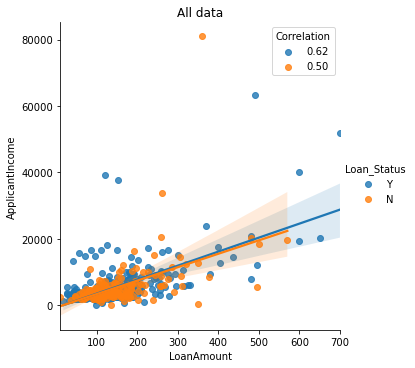

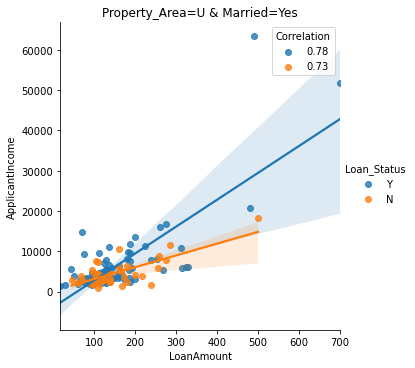

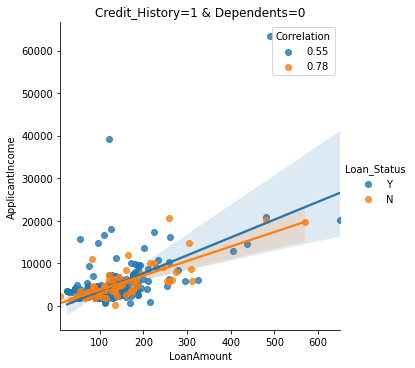

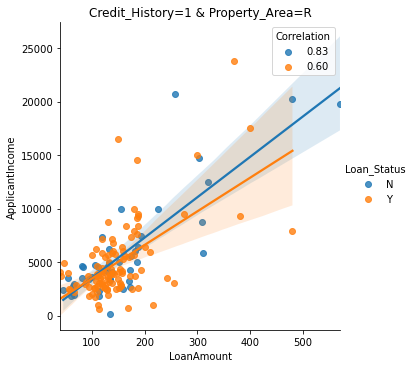

In [41]:
sns.reset_orig()

def plotCorrOne(xy, dftx, title):
    
    
    
    # Plot & set title            
    g = sns.lmplot(x=xy[0], y=xy[1], hue="Loan_Status", data=dftx)
    axes = g.axes.flatten()
    axes[0].set_title(title)


    # Set correlation for each status
    handles, labels = axes[0].get_legend_handles_labels()   
    
    
            
    corr0 = dftx[dftx['Loan_Status'] == labels[0]].corr().iloc[0, 1]
    corr1 = dftx[dftx['Loan_Status'] == labels[1]].corr().iloc[0, 1]        
    labels[0] = '{0:.2f}'.format(corr0)
    labels[1] = '{0:.2f}'.format(corr1)                  
    axes[0].legend(handles, labels, title='Correlation')
            

def plotCorrFull(dfcorr, df):
    
    # Get all xy
    xyall = np.unique(np.concatenate([x[0][2] for x in dfcorr]))
    
    # Get all combination of x and y
    xyarr = [(xyall[i], xyall[j]) for i, x in enumerate(xyall) for j in range(0, i)]    
    
   
    for xy in xyarr:
        
        # List all items exist the combination xy
        items = [ x for i, x in enumerate(dfcorr) if xy[0] in x[0][2] and xy[1] in x[0][2] ]
        
        
        
        # Plot the standard one - all data        
        plotCorrOne(xy, df[[xy[0], xy[1], 'Loan_Status']], 'All data')
        
        
        # Iterate through items        
        for x in items: 
                        
            # Get variables and value
            colarr = x[0][0]
            valarr = x[0][1].split('...')            

            # Get data with conditions             
            tx = [pd.Series(df[colarr[i]] == valarr[i]) for i, x in enumerate(colarr)]              
            dft = df[tx[0] & tx[1]] if len(tx) > 1 else df[tx[0]]    
                        
            # Make title for plot
            title = ' & '.join([colarr[i] + '=' + valarr[i] for i, x in enumerate(colarr)])                                  
            
            # Plot            
            plotCorrOne(xy, dft[[xy[0], xy[1], 'Loan_Status']], title)
        
# plotCorrFull(dfcorr + dfcorrByClass, df)
plotCorrFull(dfcorrByClass, df)

There could be higher correlation between numeric variables with subsets of data. We can see it here that the correlation between 'LoanAmount' and 'ApplicantIncome' by 'Loan_Status' Yes or No goes up to more than 0.7 when data is divided by joining different categorical variables such Property_Area, Credit_History or Married.

In [42]:

def checkDistributionByClass(df, colarr, colIndex, thres_class, thres_diff, dist_type):
    
    # Result
    res = []
    
    # Get percent for each class item
    dft = df.groupby(colarr)[colIndex].count().reset_index()
    dft['ClassCombine'] = dft.apply(lambda x: '...'.join([str(x[i]) for i in colarr]), axis=1)    
    dft['Percent'] = dft[colIndex] / df.shape[0]
    
    # Get mean of each dataframe
    df1 = df[df['Loan_Status'] == 'Y']
    df2 = df[df['Loan_Status'] == 'N']
                
    # Get mean
    m1 = df1.mean()
    m2 = df2.mean()    
    
    m1 = m1[~np.isinf(m1)]
    m2 = m2.loc[m1.index]
    
    # Iterate through all classes
    for i, idx in enumerate(dft['ClassCombine']):
        
        # Retrieve dataframe for that class
        t = df.apply(lambda x: '...'.join([str(x[i]) for i in colarr]), axis=1)
        dftx = df[t == idx]

        # Get dataframe with each class of target variable            
        dftx1 = dftx[dftx['Loan_Status'] == 'Y']
        dftx2 = dftx[dftx['Loan_Status'] == 'N']
        
        
        # Check threshold class
        num1 = (dftx1.shape[0] / df1.shape[0]) > thres_class
        num2 = (dftx2.shape[0] / df2.shape[0]) > thres_class        
        if (num1 == False and num2 == False):
            continue
               
        if dist_type == 'mean':
                        
            # Check threshold percent
            x1 = np.mean(dftx1)
            x2 = np.mean(dftx2)
                    
            # Check the mean difference
            t1 = (x1 - m1).apply(abs) / m1 > thres_diff
            t2 = (x2 - m2).apply(abs) / m2 > thres_diff  

        elif dist_type == 'median':            
            
            # Get median            
            m1 = pd.Series([np.median(df[x]) for x in m1.index], index = m1.index)
            m2 = pd.Series([np.median(df[x]) for x in m2.index], index = m2.index)

            # Medium
            x1 = pd.Series([np.median(dftx1[x]) for x in m1.index], index = m1.index)
            x2 = pd.Series([np.median(dftx2[x]) for x in m2.index], index = m2.index)
                
            t1 = (x1 - m1).apply(abs) / m1 > thres_diff
            t2 = (x2 - m2).apply(abs) / m2 > thres_diff
            
        
        # Check the mean
        t = t1 | t2         
        
        #
        if (t.any()):

            # Get columns to match condition
            tcols = np.unique(np.concatenate((x1[t1].index, x2[t2].index)))
            
            # Get array of mean
            mean_arr = [m1[t1], x1[t1], m2[t2], x2[t2]]
                        
            # Add to list result
            res.append((colarr, idx, tcols, [dftx1.shape[0], dftx2.shape[0]], mean_arr))               
                
    return(res)

thres_class = 0.3
thres_diff = 0.3
colIndex = 'Loan_ID'

# Find all combination of 2 columns in cate_cols
colarrs1 = [[x] for x in cate_cols]
colarrs2 = [[cate_cols[i], cate_cols[j]] for i, col in enumerate(cate_cols) for j in range(0, i)]
colarrs = colarrs1 + colarrs2

# Check correlation all combination
meanAll = [checkDistributionByClass(df, colarr, colIndex, thres_class, thres_diff, 'median') for colarr in colarrs] 
dfdistByClass = [x for x in meanAll if x]
#dfdistByClass
print('Done')

Done


In [43]:
def filterDistClass(df):
    
    ressult = []
    comb_arr = []
    
    # Get all combinations
    def make_combine(xi):
        item = xi[0]
        cols = item[0]
        ys = item[2] 
        
        if (len(cols) == 1):
            return([cols[0] + '...' + y for y in ys])
        else:
            return []
                   
        
    # Check one combination  
    def val_combine(cols, comb_arr, y):
        
        cx = [
            cols[0] + '...' + y,
            cols[1] + '...' + y,
            y + '...' + cols[0],
            y + '...' + cols[1]
        ]

        check = any(c in comb_arr for c in cx)

        return [y] if check == False else []
            
    # Validate one item in a row
    def val_item(xi, comb_arr):
        item = xi[0]
        cols = item[0]
        ys = item[2]
        
        if (len(cols) == 2):
            yt = np.concatenate([val_combine(cols, comb_arr, y) for y in ys])            
            if len(yt) > 0:
                item_new = [x if i!=2 else yt for i, x in enumerate(item)]                
                return [item_new]
            else:
                return []
        else: 
            return [item]
            
    
    # Create all combinations of variables
    comb_arr = np.concatenate([make_combine(x) for x in df])
    
    # Remove all redundant rows 
    result = [val_item(x, comb_arr) for x in df]
    result = [x for x in result if len(x) > 0]
    
    return result
            
dfdistByClass2 = filterDistClass(dfdistByClass)
print('Done')

Done


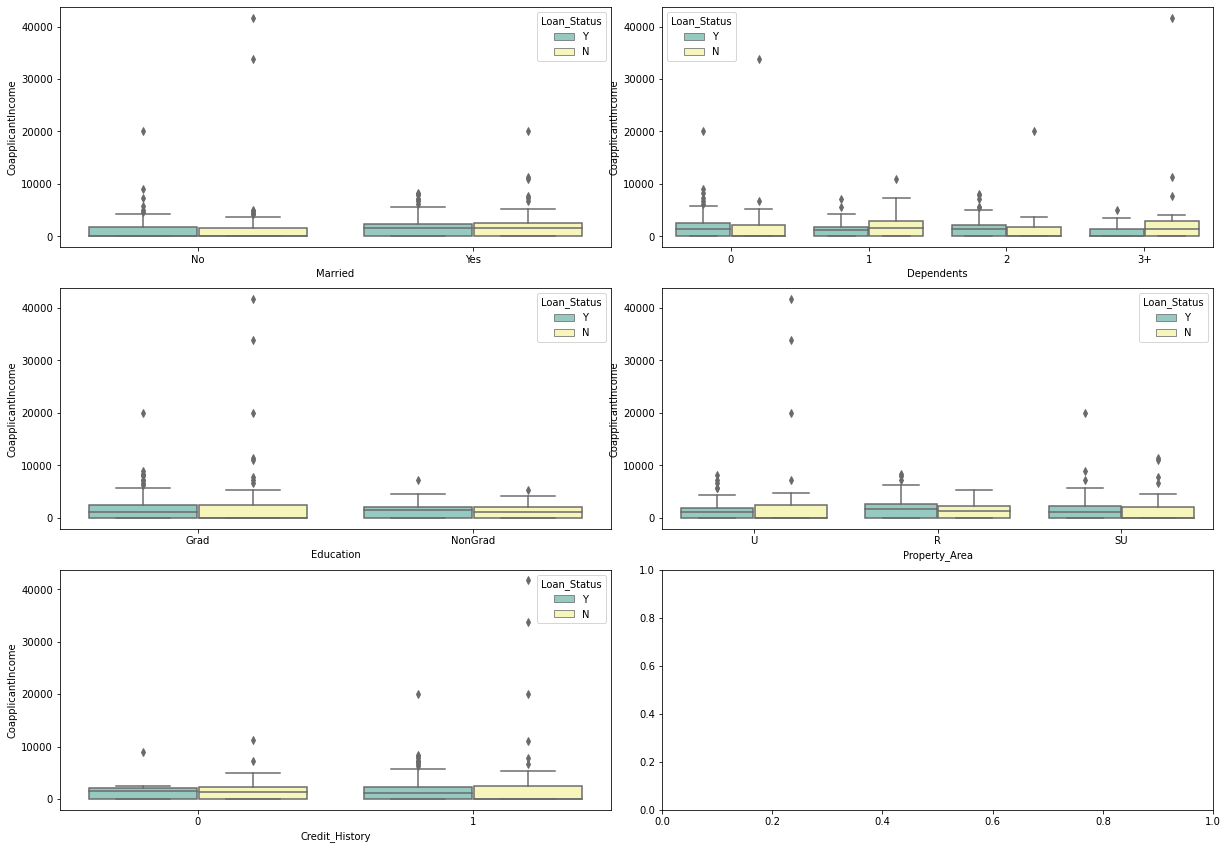

In [44]:
sns.reset_orig()
plt.rcParams['figure.figsize'] = [17, 12]
fig, axes = plt.subplots(3, 2)
axes = axes.flatten()
fig.tight_layout(pad=2)

k=0
for i, xi in enumerate(dfdistByClass2):
    item = xi[0]
    cols = item[0]
    ys = item[2]    
    
    for j, y in enumerate(ys):        
        if len(cols) == 1:
            sns.boxplot(x=cols[0], y=y, hue="Loan_Status",
                             data=df, palette="Set3", ax=axes[k])
            
    k=k+1

    
for i, xi in enumerate(dfdistByClass2):
    item = xi[0]
    cols = item[0]
    ys = item[2]    
    
    for j, y in enumerate(ys):        
        if len(cols) > 1:
            sns.catplot(x=cols[1], y=y, hue="Loan_Status",
                    col=cols[0], data=df, kind="box");
    

It is interesting to discover that most applicants be rejected for loan approval have Coapplicant with zero. For example, the applicants with Dependants 0 or 2 or applicants with Graducation level, etc.

### Treat Extreme value 

Loan Amount and Applicant Amount and Coapplicant amount exist few extreme values as we see earlier. Now we see how we can deal with these values.

About Loan Amount, it is possible that people might apply for high value loans due to specific needs. So instead of treating them as an outliers, let's try log transformation to nullify their effects.

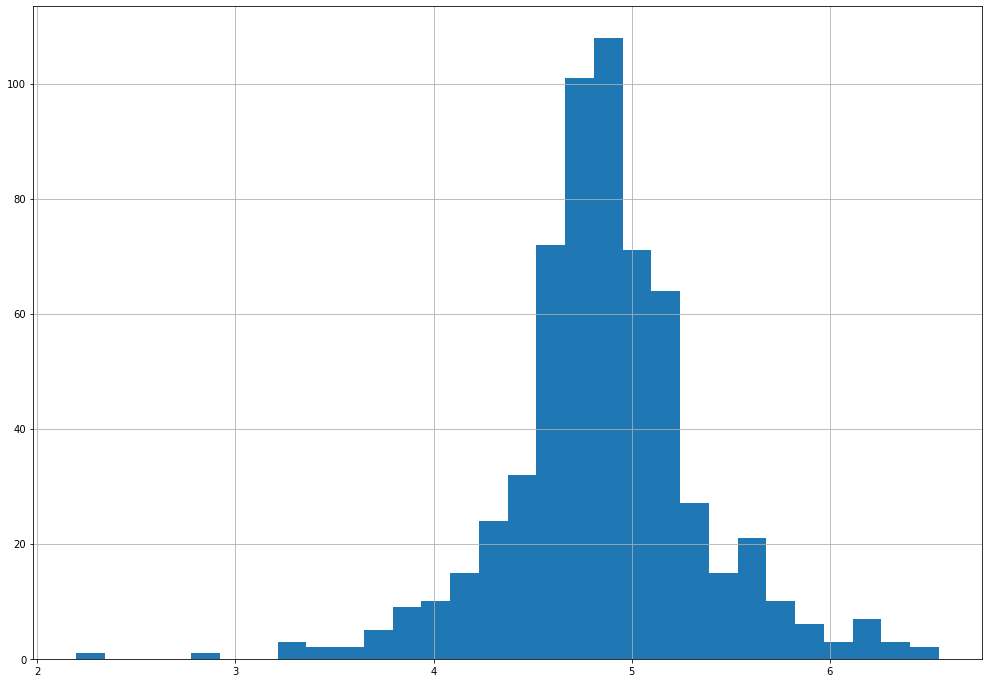

In [45]:
df['LoanAmount_Log'] = np.log(df['LoanAmount'])
df['LoanAmount_Log'].hist(bins=30)

Regarding to Applicant Income, it is intuitive that some lower income but receive strong support from co-applicants. So it is a good idea to combine both incomes into one, called TotalIncome. So we can see the distribution is much better.

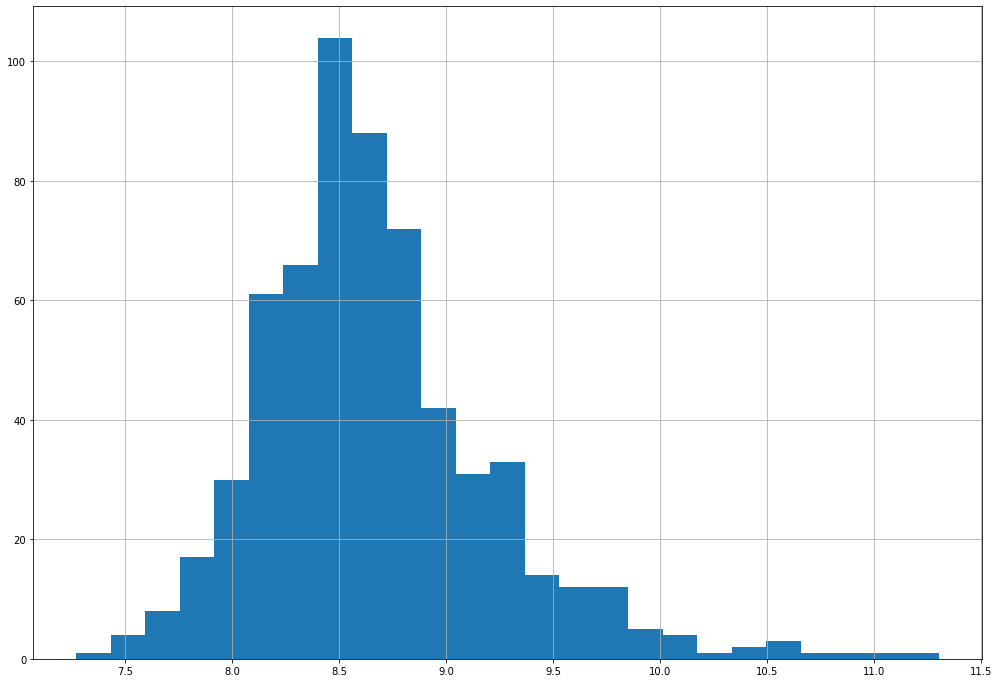

In [46]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=25)

### Select features to train the model

#### Variance threshold

In [47]:
cate_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']
num_cols = ['TotalIncome', 'LoanAmount_Log', 'Loan_Amount_Term']
cate_cols_encode = []

from sklearn import preprocessing

# Encode categofical feature
le = preprocessing.LabelEncoder()
for col in cate_cols:
    df[col + "_"] = le.fit_transform(df[col])
    cate_cols_encode.append(col + '_')

df['Loan_Status_'] = le.fit_transform(df['Loan_Status'])
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
LoanAmount_Log       float64
TotalIncome          float64
TotalIncome_log      float64
Gender_                int64
Married_               int64
Dependents_            int64
Education_             int64
Self_Employed_         int64
Property_Area_         int64
Credit_History_        int64
Loan_Status_           int64
dtype: object

In [48]:
from sklearn.feature_selection import VarianceThreshold

threshold_n=0.85

dft = df[cate_cols_encode]

sel = VarianceThreshold(threshold=(threshold_n * (1 - threshold_n) ))
sel_var=sel.fit_transform(dft)

pd.DataFrame({'Variance' : [x for x in sel.variances_], 
                 'Selected' : sel.get_support()},
                 index=dft.columns).sort_values(by=['Variance'], ascending=True)

Variance  Selected
Self_Employed_   0.115715     False
Credit_History_  0.123940     False
Gender_          0.149137      True
Education_       0.170612      True
Married_         0.226562      True
Property_Area_   0.619118      True
Dependents_      1.017679      True

#### Correlation analysis

In [49]:
corrMatrix = df[num_cols].corr()
t = [[x + '...' + corrMatrix.columns[j], corrMatrix.iloc[i,j]] for i,x in enumerate(corrMatrix) for j in range(i+1, len(corrMatrix))]
pd.DataFrame.from_records(t).sort_values(by=1)

0         1
1     TotalIncome...Loan_Amount_Term -0.070917
2  LoanAmount_Log...Loan_Amount_Term  0.084512
0       TotalIncome...LoanAmount_Log  0.512131

#### Chi-square test 

In [50]:
from sklearn.feature_selection import SelectKBest, chi2

X = np.array(df[cate_cols_encode])
y = df['Loan_Status_']
s = SelectKBest(chi2, k=len(cate_cols_encode))
s.fit(X,y)

pd.DataFrame({'chi-scores' : [round(x, 4) for x in s.scores_], 
                 'pvalue' : ["{:.5f}".format(x) for x in s.pvalues_]},               
                 index=cate_cols_encode).sort_values(by=['chi-scores'], ascending=False)

chi-scores   pvalue
Credit_History_     26.0059  0.00000
Education_           3.5405  0.05989
Married_             1.7824  0.18185
Property_Area_       0.3778  0.53876
Dependents_          0.0860  0.76939
Gender_              0.0362  0.84903
Self_Employed_       0.0073  0.93198

#### ANOVA f test

In [51]:
from sklearn.feature_selection import SelectKBest, f_classif

X = np.array(df[num_cols])
y = df['Loan_Status_']
s = SelectKBest(f_classif, k=len(num_cols))
s.fit(X,y)

pd.DataFrame({'f-scores' : [round(x, 4) for x in s.scores_], 
                 'pvalue' : ["{:.5f}".format(x) for x in s.pvalues_]},
                 index=num_cols).sort_values(by=['f-scores'], ascending=False)

f-scores   pvalue
LoanAmount_Log      0.9538  0.32915
TotalIncome         0.5990  0.43924
Loan_Amount_Term    0.3113  0.57707

### Building a predictive model

In [64]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
X = df[cate_cols_encode + num_cols]
y = df['Loan_Status_']

In [69]:
state = 12  
test_size = 0.30  
  
X_train, X_test, y_train, y_test = train_test_split(X, y,  
    test_size=test_size, random_state=state)

In [87]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.metrics import accuracy_score
        
gbm0 = GradientBoostingClassifier(random_state=10)

#Fit the algorithm on the data
gbm0.fit(X_train, y_train)

print('Accuracy score on the train set: ', gbm0.score(X_train, y_train))
print('Accuracy on the test set: ', gbm0.score(X_test, y_test))

Accuracy score on the train set:  0.9044289044289044
Accuracy on the test set:  0.8054054054054054


In [96]:
from sklearn.model_selection import cross_validate
scores = cross_validate(gbm0, X, y, cv=3,
                            scoring=('accuracy', 'roc_auc'),
                            return_train_score=True)
cv_score = scores['test_accuracy']
print("Test CV Score : Mean  %.7g | Std  %.7g | Min  %.7g | Max  %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

Test CV Score : Mean  0.7703491 | Std  0.03013717 | Min  0.7365854 | Max  0.8097561


In [85]:
# Predict 
y_pred = gbm0.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Prediction'])

Prediction   0    1
Actual             
0           31   27
1            9  118

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.53      0.63        58
           1       0.81      0.93      0.87       127

    accuracy                           0.81       185
   macro avg       0.79      0.73      0.75       185
weighted avg       0.80      0.81      0.79       185



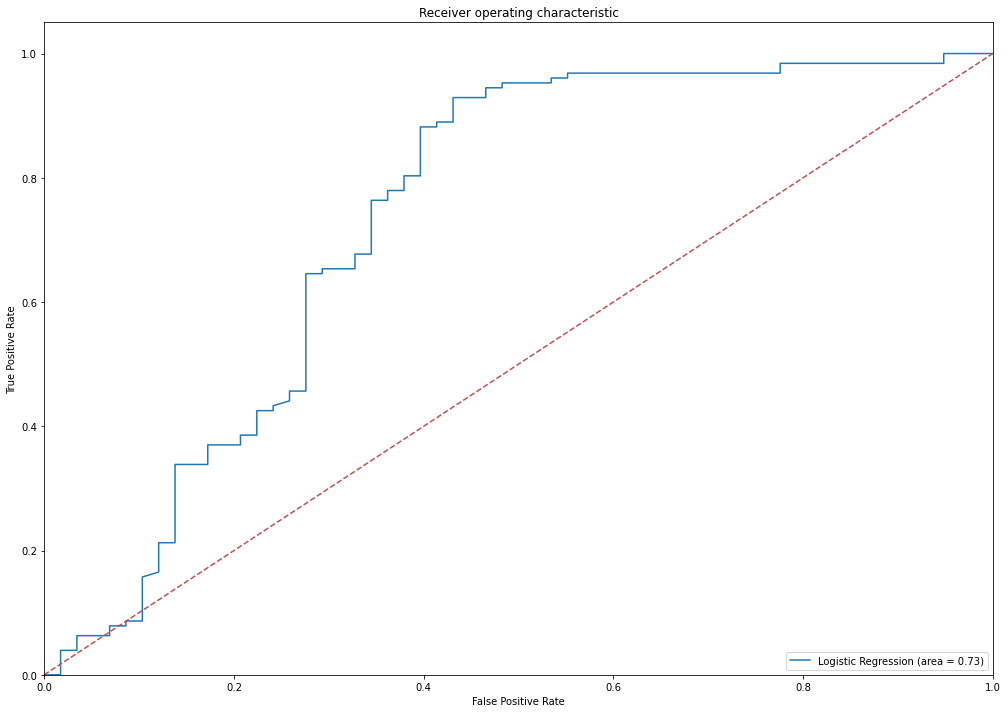

In [86]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, gbm0.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

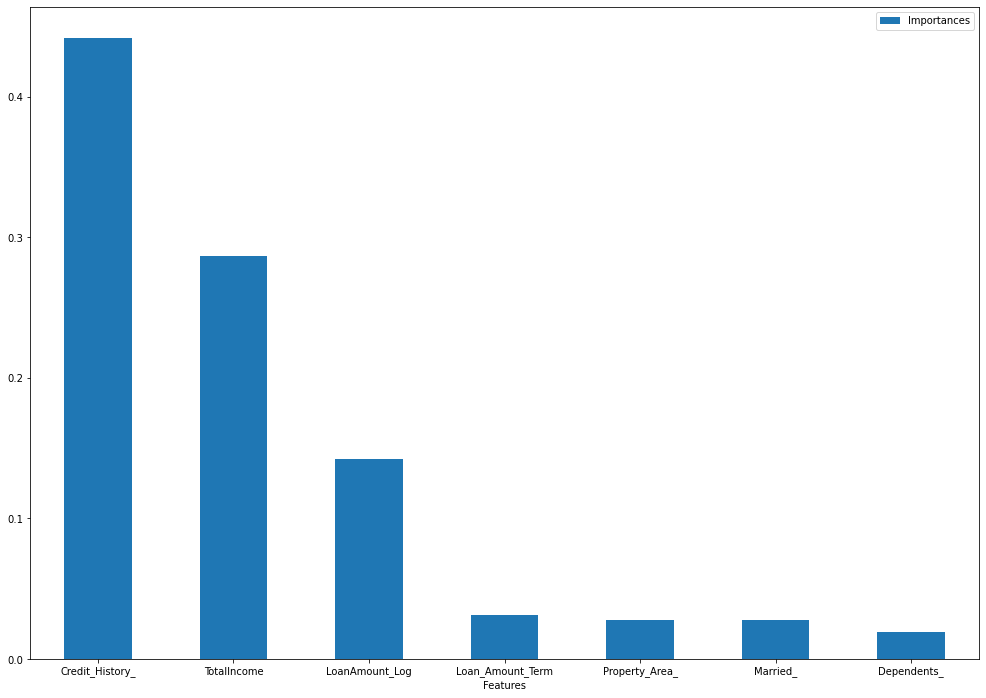

In [97]:
dft = pd.DataFrame({'Features': X.columns, 
                    'Importances': gbm0.feature_importances_}).nlargest(7, 'Importances')
dft.plot.bar(x='Features', y='Importances', rot=0)

In [ ]:
# Dataframe 
dft = pd.DataFrame({'Features': X.columns, 
                    'Importances': clf.feature_importances_}).sort_values(by='Importances', ascending=False)

# list of x locations for plotting
x_values = list(range(len(dft['Importances'])))

# Cumulative importances
cumulative_importances = np.cumsum(dft['Importances'])

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(dft['Importances']), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, dft['Features'], rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

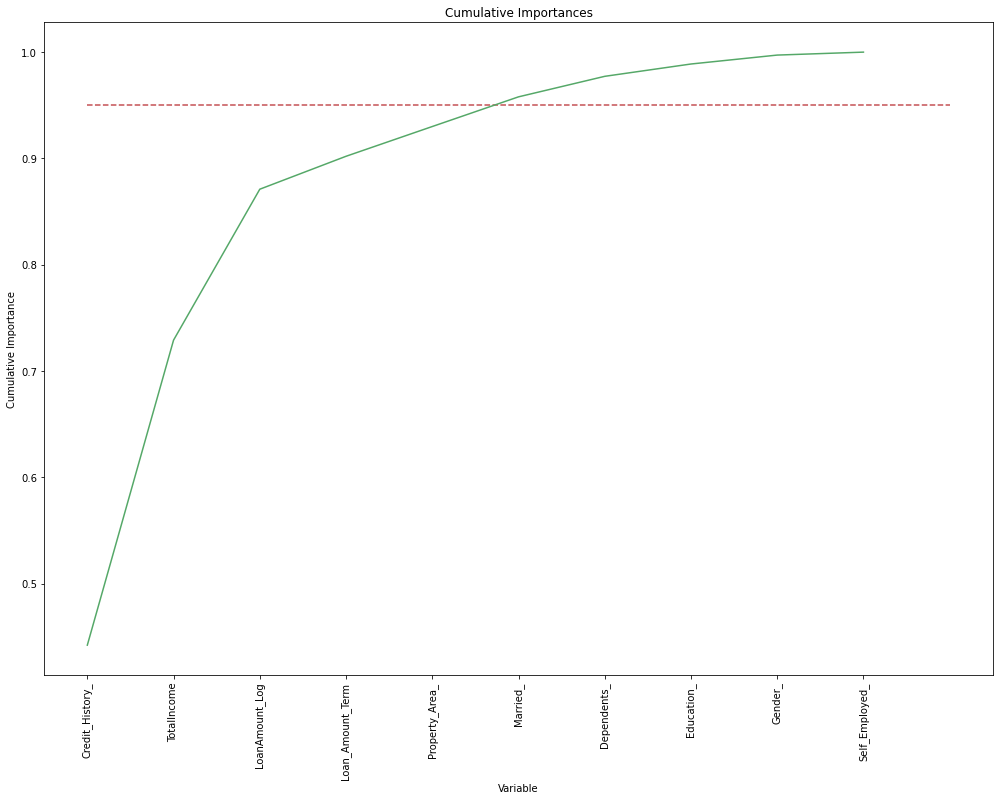

In [98]:
# Dataframe 
dft = pd.DataFrame({'Features': X.columns, 
                    'Importances': gbm0.feature_importances_}).sort_values(by='Importances', ascending=False)

# list of x locations for plotting
x_values = list(range(len(dft['Importances'])))

# Cumulative importances
cumulative_importances = np.cumsum(dft['Importances'])

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(dft['Importances']), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, dft['Features'], rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [100]:
from sklearn.inspection import permutation_importance

r = permutation_importance(gbm0, X_test, y_test, n_repeats=30, random_state=0)

pd.DataFrame({'Features': X.columns, 
                    'Importances': r['importances_mean']}).sort_values(by='Importances', ascending=False)

Features  Importances
6   Credit_History_     0.185946
7       TotalIncome     0.057838
8    LoanAmount_Log     0.034234
0           Gender_     0.003243
5    Property_Area_     0.003063
2       Dependents_     0.001081
3        Education_     0.000000
4    Self_Employed_     0.000000
9  Loan_Amount_Term    -0.000360
1          Married_    -0.007748

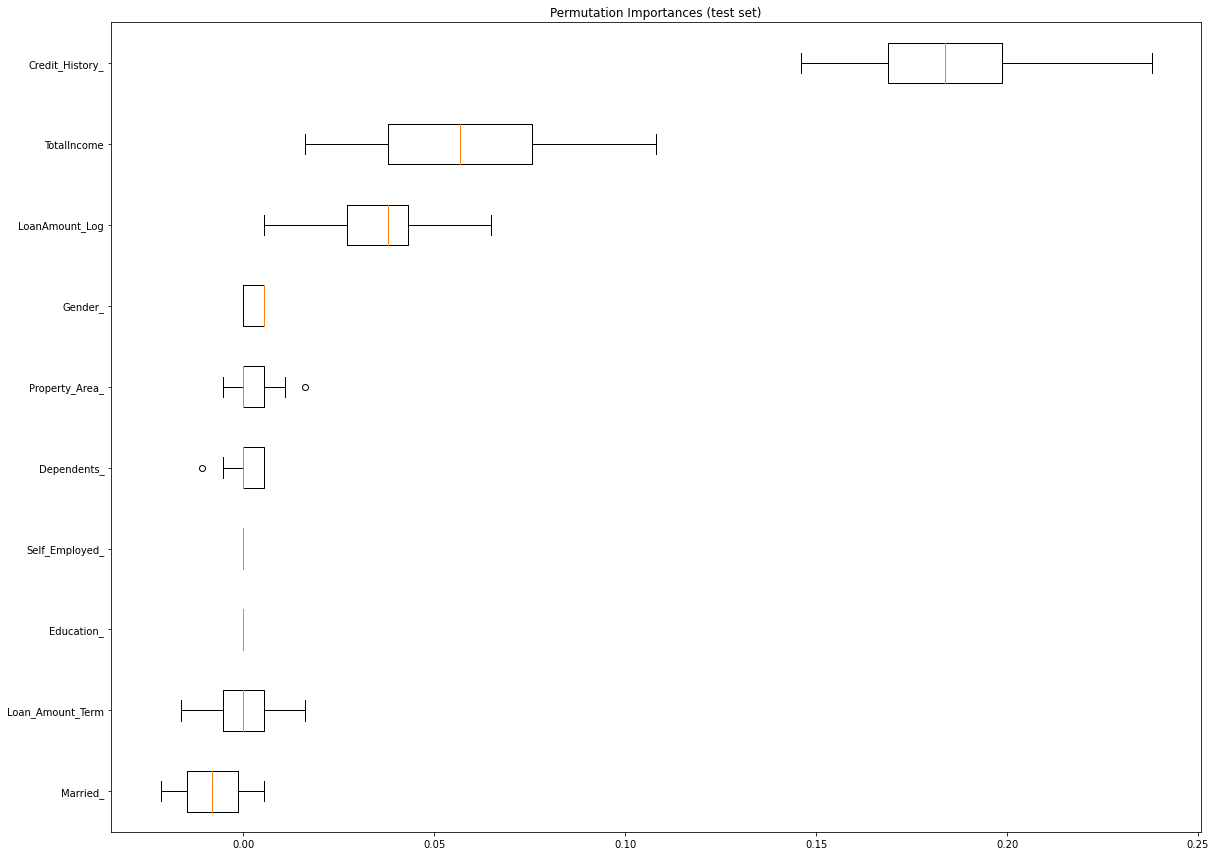

In [101]:
sorted_idx = r.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(r.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

### Improve model

In [104]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,16,2),
    'max_features': range(1, X_train.shape[1], 2),
    'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
    'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
    'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
#    'subsample': [0.6,0.7, 0.8, 0.9]
}

# Create a based model
gbm = GradientBoostingClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = gbm, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 13500 candidates, totalling 40500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 2552 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 4816 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 6048 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 7828 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 9825 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 10980 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 13376 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 16338 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 22224 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 27776 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 31828 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 36200 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 40500 out

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 16, 2),
                         'max_features': range(1, 10, 2),
                         'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                         'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200]},
             verbose=2)

In [173]:
best_grid = grid_search.best_estimator_
print('----------------')
print('Best grid model:')
print(grid_search.best_params_)
print('- Accuracy on the test set: ', best_grid.score(X_test, y_test))

# Predict 
y_pred = best_grid.predict(X_test)
print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Prediction']))

print('----------------')
print('Improvement from previous model {:0.2f}%.'.format(  
                                        100 * (best_grid.score(X_test, y_test) - 
                                               gbm0.score(X_test, y_test)) / gbm0.score(X_test, y_test)))

----------------
Best grid model:
{'max_depth': 11, 'max_features': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 100}
- Accuracy on the test set:  0.8216216216216217
Prediction   0    1
Actual             
0           29   29
1            4  123
----------------
Improvement from previous model 2.01%.


### Training curves
We can perform grid search over only one parameter to observe the effects of changing that parameter on performance. We will look at training time, training set accuracy, and testing set accuracy.

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    4.0s finished


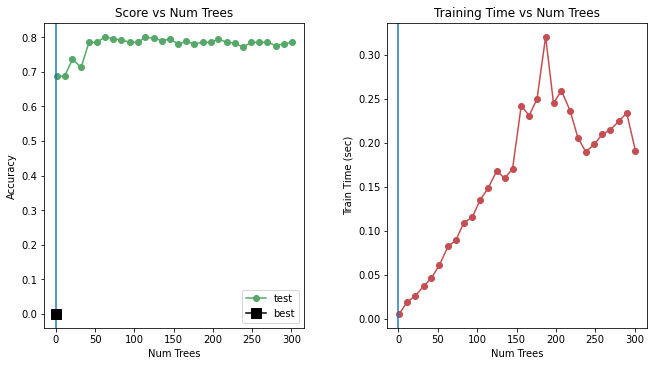

In [170]:
def plot_results(model, param = 'n_estimators', name = 'Num Trees', best_point = [0,0]):
    param_name = 'param_%s' % param

    # Extract information from the cross validation model
    #train_scores = model.cv_results_['mean_train_score']
    test_scores = model.cv_results_['mean_test_score']
    train_time = model.cv_results_['mean_fit_time']
    param_values = list(model.cv_results_[param_name])
    
    # Plot the scores over the parameter
    plt.subplots(1, 2, figsize=(10, 6))
    plt.subplot(121)
    #plt.plot(param_values, train_scores, 'bo-', label = 'train')
    plt.plot(param_values, test_scores, 'go-', label = 'test')
    plt.axvline(x=best_point[0])
    plt.plot(best_point[0], best_point[1], marker='s', markersize=10, color="black", label='best')
    #plt.ylim(ymin = min(test_scores) - (max(test_scores) - min(test_scores))/10, ymax = max(test_scores) + (max(test_scores) - min(test_scores))/10)    
    plt.legend()
    plt.xlabel(name)
    plt.ylabel('Accuracy')
    plt.title('Score vs %s' % name)
    
    plt.subplot(122)
    plt.plot(param_values, train_time, 'ro-')
    plt.axvline(x=best_point[0])
    #plt.ylim(ymin = min(train_time) - (max(train_time) - min(train_time))/10, ymax = max(train_time) + (max(train_time) - min(train_time))/10)
    plt.xlabel(name)
    plt.ylabel('Train Time (sec)')
    plt.title('Training Time vs %s' % name)
    
    
    plt.tight_layout(pad = 4)
    

# # Grid with only the number of trees changed
# tree_grid = {'n_estimators': [int(x) for x in np.linspace(1, 301, 30)]}

# # Create the grid search model and fit to the training data
# tree_grid_search = GridSearchCV(best_grid, param_grid=tree_grid, verbose = 2, n_jobs=-1, cv = 3,
#                                 scoring = 'accuracy')
# tree_grid_search.fit(X_train, y_train);

# plot_results(tree_grid_search)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.6s finished


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s finished


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  27 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.5s finished


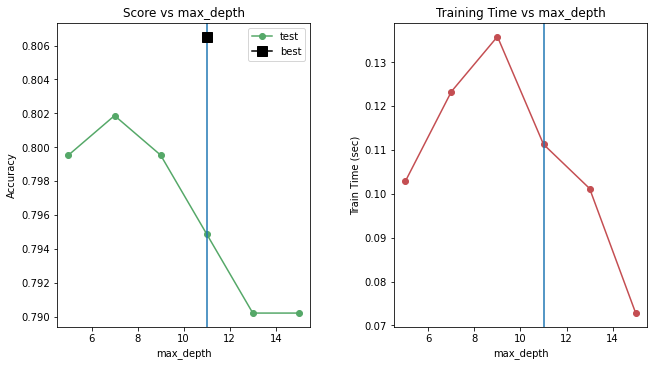

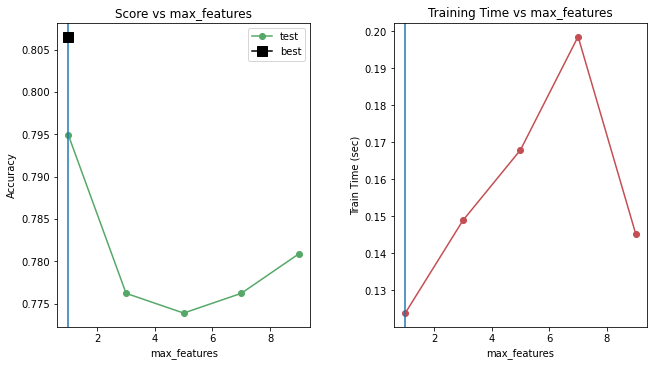

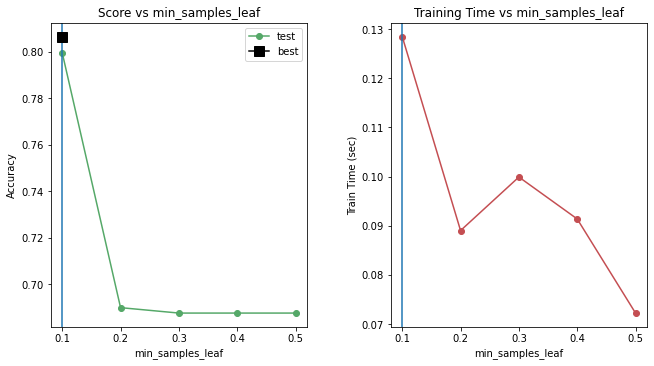

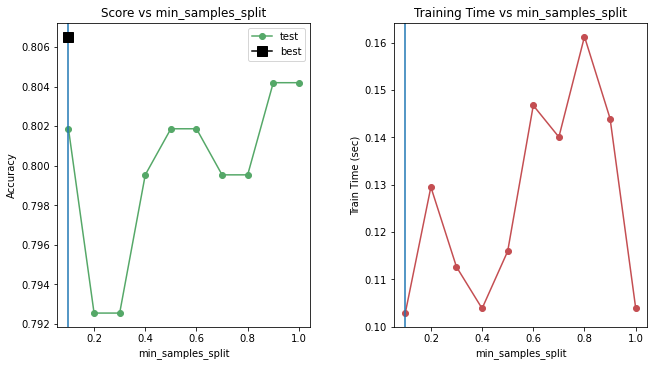

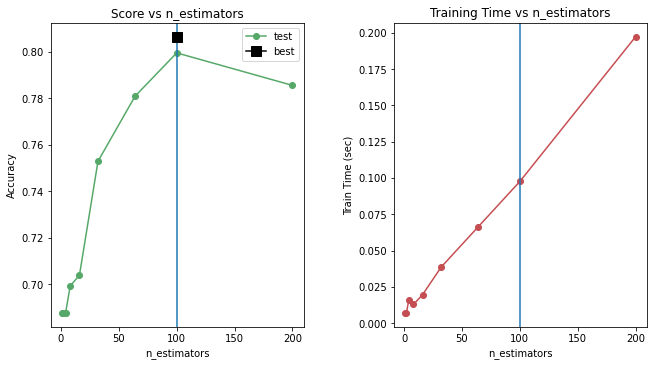

In [171]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,16,2),
    'max_features': range(1, X_train.shape[1], 2),
    'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
    'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
    'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
}

best_param = {}
for x in grid_search.best_params_:
    best_param[x] = [grid_search.best_params_[x]]

for x in param_grid:

    # Build the best param
    tparam = {}
    for t in grid_search.best_params_:
        tparam[t] = [grid_search.best_params_[t]]    
    tparam[x] = param_grid[x]
    
    # Get the best point in gridsearch best params
    best_point = [grid_search.best_params_[x], grid_search.best_score_]
    
    
    # Create the grid search model and fit to the training data
    grid_search_t = GridSearchCV(best_grid, param_grid=tparam, verbose = 2, n_jobs=-1, cv = 3,
                                    scoring = 'accuracy')
    grid_search_t.fit(X_train, y_train);    

    plot_results(grid_search_t, param=x, name=x, best_point = best_point)


### Reference
https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4

https://www.datasciencecentral.com/profiles/blogs/how-to-treat-missing-values-in-your-data-1

https://growingdata.com.au/a-guided-introduction-to-exploratory-data-analysis-eda-using-python/

https://seaborn.pydata.org/tutorial/axis_grids.html

https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/#four

https://journals.plos.org/ploscompbiol/article/file?id=10.1371/journal.pcbi.1006907&type=printable

https://towardsdatascience.com/dimensionality-reduction-toolbox-in-python-9a18995927cd

https://medium.com/sho-jp/linear-algebra-101-part-9-singular-value-decomposition-svd-a6c53ed2319e

https://www.youtube.com/watch?v=EokL7E6o1AE

https://www.youtube.com/watch?v=P5mlg91as1c&t=62s

https://medium.com/@jonathan_hui/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491

https://www.statgraphics.com/categorical-data-analysis#Frequency%20Tables

https://www.qualtrics.com/eng/correspondence-analysis-what-is-it-and-how-can-i-use-it-to-measure-my-brand-part-1-of-2/#:~:text=Correspondence%20analysis%20reveals%20the%20relative,that%20apply%20to%20these%20brands.


https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3718710/

https://www.displayr.com/how-correspondence-analysis-works/

https://www.ncss.com/software/ncss/multivariate-analysis-in-ncss/

https://stats.idre.ucla.edu/spss/seminars/efa-spss/

https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1006907

https://www.ibm.com/support/knowledgecenter/SSLVMB_sub/statistics_mainhelp_ddita/spss/categories/idh_mcan.html

http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/114-mca-multiple-correspondence-analysis-in-r-essentials/

https://bookdown.org/kirthanarao95/rm3_book/multiple-correspondence-analysis.html

http://vxy10.github.io/2016/06/10/intro-MCA/

https://stackoverflow.com/questions/48521740/using-mca-package-in-python


https://github.com/MaxHalford/prince#correspondence-analysis-ca

https://datascienceplus.com/selecting-categorical-features-in-customer-attrition-prediction-using-python/


https://libguides.library.kent.edu/SPSS/ChiSquare

https://www.datacamp.com/community/tutorials/feature-selection-python

https://stackoverflow.com/questions/57273694/how-selectkbest-chi2-calculates-score

https://datascience.stackexchange.com/questions/74465/how-to-understand-anova-f-for-feature-selection-in-python-sklearn-selectkbest-w

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

https://machinelearningmastery.com/feature-selection-with-categorical-data/

https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63

https://elitedatascience.com/dimensionality-reduction-algorithms

https://elitedatascience.com/machine-learning-algorithms

https://stackoverflow.com/questions/49444262/normalize-data-before-or-after-split-of-training-and-testing-data#:~:text=Don't%20forget%20that%20testing,and%20dividing%20by%20the%20variance.

https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223

https://blog.minitab.com/blog/adventures-in-statistics-2/understanding-analysis-of-variance-anova-and-the-f-test

https://www.pythonfordatascience.org/anova-python/

https://stats.stackexchange.com/questions/203740/logistic-regression-scikit-learn-vs-statsmodels

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019

https://medium.com/@a.ydobon/justforfunpython-how-to-interpret-a-classification-report-189edc487460

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

https://www.linkedin.com/learning/healthcare-analytics-regression-in-r/odds-ratio-interpretation?u=2129308

https://stackoverflow.com/questions/15433372/stepwise-regression-in-python

https://datascience.stackexchange.com/questions/24405/how-to-do-stepwise-regression-using-sklearn/24447#24447

https://www.kaggle.com/talhahascelik/automated-stepwise-backward-and-forward-selection

https://towardsdatascience.com/binary-logistic-regression-using-python-research-oriented-modelling-and-interpretation-49b025f1b510

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

https://towardsdatascience.com/improving-random-forest-in-python-part-1-893916666cd

https://www.displayr.com/how-is-variable-importance-calculated-for-a-random-forest/

https://bambielli.com/til/2017-10-29-gini-impurity/

https://bambielli.com/til/2017-10-22-information-gain/

https://gdcoder.com/random-forest-regression-model-explained-in-depth-part-2-python-code-snippet-using-sklearn/

https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html

https://scikit-learn.org/stable/modules/permutation_importance.html#id2

https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

https://www.kaggle.com/dansbecker/permutation-importance

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/

https://github.com/WillKoehrsen/Machine-Learning-Projects/tree/master/random_forest_explained

https://sefiks.com/2018/08/28/a-step-by-step-regression-decision-tree-example/


Adaboost algorithm

https://www.youtube.com/watch?v=LsK-xG1cLYA&t=1054s

https://sefiks.com/2018/11/02/a-step-by-step-adaboost-example/

https://www.youtube.com/watch?v=9CPsYsB4OLI

http://ais.informatik.uni-freiburg.de/teaching/ws11/robotics2/pdfs/rob2-18-adaboost.pdf

https://www.datacamp.com/community/tutorials/adaboost-classifier-python

https://blog.paperspace.com/adaboost-optimizer/

http://www.ccs.neu.edu/home/vip/teach/MLcourse/4_boosting/slides/boosting.pdf



Gradient Boost

https://www.youtube.com/watch?v=3CC4N4z3GJc&t=41s

https://www.youtube.com/watch?v=2xudPOBz-vs

https://www.youtube.com/watch?v=jxuNLH5dXCs

https://www.youtube.com/watch?v=StWY5QWMXCw

https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab

https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/

https://www.youtube.com/watch?v=sRktKszFmSk

https://www.youtube.com/watch?v=WZvPUGNJg18

http://www.chengli.io/tutorials/gradient_boosting.pdf

https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting

https://www.youtube.com/watch?v=UHBmv7qCey4

https://www.frontiersin.org/articles/10.3389/fnbot.2013.00021/full

https://www.coursera.org/learn/ml-classification/supplement/07FKm/slides-presented-in-this-module

https://datascience.stackexchange.com/questions/39193/adaboost-vs-gradient-boosting

https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725

https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d

https://blog.paperspace.com/gradient-boosting-for-classification/

https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae


Example

https://datascience.stackexchange.com/questions/9134/gradient-boosting-algorithm-example

https://sefiks.com/2018/10/04/a-step-by-step-gradient-boosting-decision-tree-example/
